Grupo: Juan Gómez, Oscar López, Alvaro Robles, Tomás Rocha. Proyecto 1: Aplicaciones Computacionales.


# Plantillas desde SXS
Primero instalamos la libreria sxs `!pip install sxs -q`

In [ ]:
!pip install sxs -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.4/224.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.2/784.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 9.2 MB/s eta 0:00:00


In [ ]:
import sxs # import sxs
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import lagrange, CubicSpline, PchipInterpolator
%config InlineBackend.figure_format = 'retina'

In [ ]:
#@title Descargar los datos de las dos estrellas de neutrones

sxs_nsns_0001 = sxs.load("SXS:NSNS:0001")
w = sxs_nsns_0001.h

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.


  0%|          | 0/5589954 [00:00<?, ?it/s]

  0%|          | 0/2537221 [00:00<?, ?it/s]

`w.metadata` los datos de los datos

In [ ]:
print('tipo de objetos: '+w.metadata.object_types) #NSNS significa que estamos trabajando con dos estrellas de neutrones

tipo de objetos: NSNS


In [ ]:
t0 = w.metadata.reference_time # tiempo de referencia, al inicio hay "junk radiation", por lo que a partir de este tiempo se consider que los valores en los datos representan información de lo que se busca medir
print(f't0 = {t0}')

t0 = 392


In [ ]:
w.data # todos los multipolos, donde aparece un número complejo que es igual a la fase de cada multipolo

array([[-7.24382646e-02-1.44631565e-02j, -1.61646484e-07+6.24457647e-07j,
         8.25692877e-03+2.20297105e-07j, ...,
         2.76025420e-08-1.48905014e-08j,  7.31472945e-13+1.16791453e-12j,
        -6.39592425e-09+2.02868756e-08j],
       [-7.46709306e-02-1.54490676e-02j, -1.65472047e-07+5.88618026e-07j,
         9.45115208e-03+1.97794663e-07j, ...,
         2.70853259e-08-1.47300284e-08j,  7.75021759e-13+1.13885578e-12j,
        -4.92436149e-09+1.85235658e-08j],
       [-7.67968441e-02-1.64515182e-02j, -1.62269988e-07+5.49803750e-07j,
         1.04977573e-02+1.71501443e-07j, ...,
         2.67669484e-08-1.48048715e-08j,  8.16500267e-13+1.10794215e-12j,
        -4.01691289e-09+1.70284458e-08j],
       ...,
       [-1.90917306e-03-8.03575343e-03j,  3.34512707e-05-2.45486923e-04j,
         4.01285143e-02-2.32361397e-04j, ...,
         1.53752239e-05-4.18220725e-07j,  8.23694256e-06+2.24412328e-06j,
         3.75965793e-06+2.26116670e-07j],
       [-1.90671852e-03-8.03929341e-03j,  4.

In [ ]:
#@title Selección del multipolo a trabajar
ell, m = 2, 2  # seleccionar el multipolo en el modo que contiene mayor cantidad de información sobre el suceso.
i22 = w.index(ell, m) # seleccionar el indice del multipolo correspondiente
print(i22)
# guardar la onda 2 2 en w_2_2
w_2_2 = w[:, i22] #La información aquí contenida representa cómo cambia la amplitud y la fase de la estrella a lo largo del tiempo, número complejo

4


In [ ]:
#@title Calculo de la fase de cada onda gravitacional
phi = np.angle(w_2_2) #Se calcula la fase de los valores medidos

fases = np.unwrap(-phi) # Se calcula la fase sin saltos de discontinuidad
fases_dif = fases[1::] - fases[:-1:] # Se calcula el valor de la diferencia de fases
(fases_dif<0).sum() #Se buscan los valores en que su diferencia sea menor que cero
max_value = np.where(fases_dif<0) #El valor máximo de la fase (el punto en que deje de ser positiva la diferencia de fases)
print(max_value[0][0])

paso = np.all(fases_dif == fases_dif[0]) #Revisar si el paso es constante, es decir, si los valores en el array de diferencias de fase son iguales o no
print(paso)

x_max = w_2_2.t[max_value[0][0]] # Se define el valor máximo en x
y_max = np.unwrap(-phi)[max_value[0][0]] # Se define el valor máximo en y



9664
False


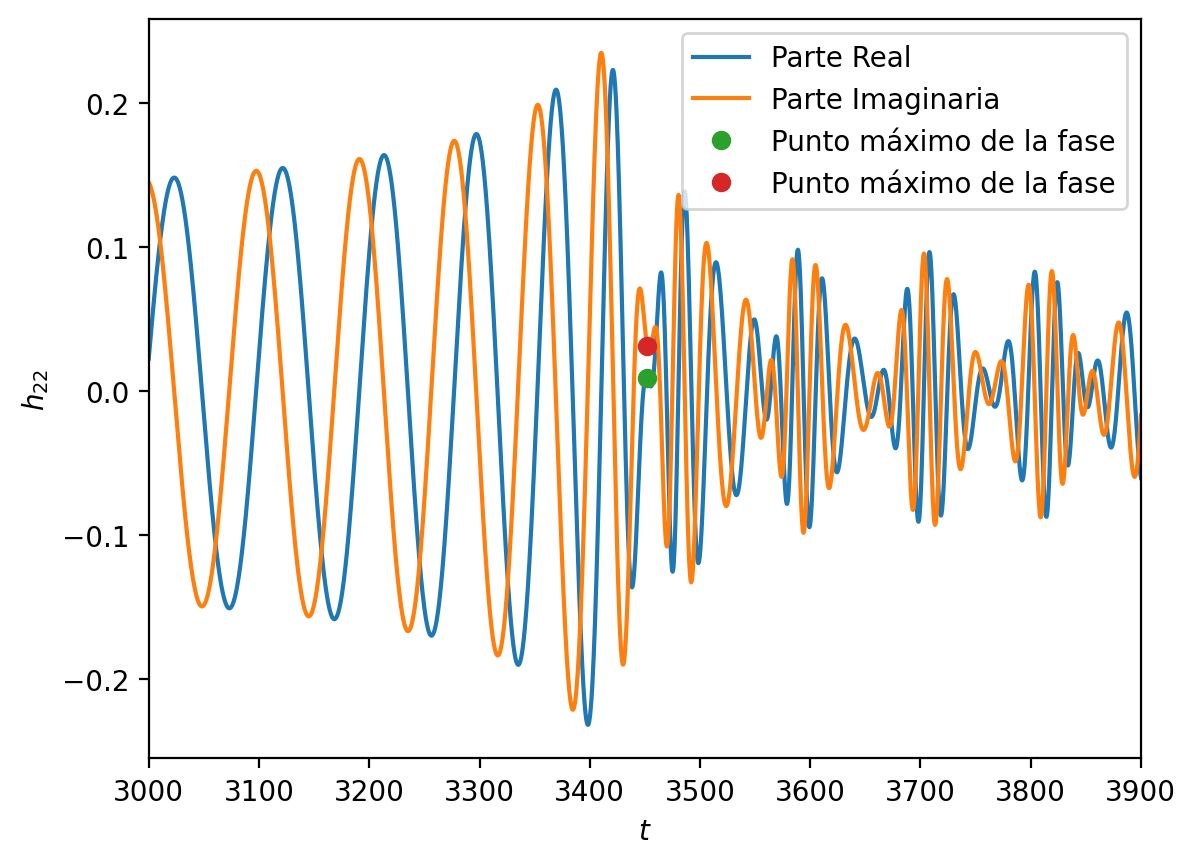

3451.9494367561624 TimeSeries([0.00928208], time=array([3451.94943676]), time_axis=0)
3451.9494367561624 TimeSeries([0.03116573], time=array([3451.94943676]), time_axis=0)


In [ ]:
#@title Gráfica del movimiento descrito en los datos de las dos estrellas de neutrones
#Se describe el movimiento del multipolo 2,2 en una gráfica, a partir de ahora se trabajará con este multipolo
plt.figure()
plt.plot(w.t, np.real(w_2_2), label='Parte Real') #Las partes real e imaginaria representan la polarización de la onda.
plt.plot(w.t, np.imag(w_2_2), label='Parte Imaginaria') #w.t representa el tiempo guardado en w correspondiente a cada punto en w
plt.plot(w.t[max_value[0][0]], np.real(w_2_2)[max_value[0][0]], 'o', label = 'Punto máximo de la fase')
plt.plot(w.t[max_value[0][0]], np.imag(w_2_2)[max_value[0][0]], 'o', label = 'Punto máximo de la fase')
plt.legend()
#plt.plot(x_max, y_max, 'ro', label = 'Punto máximo de la fase')
#plt.legend()
plt.xlim(3000,3900)
plt.xlabel(r'$t$')
plt.ylabel(r'$h_{22}$')
plt.show()

print(w.t[max_value[0][0]], np.real(w_2_2)[max_value[0][0]])
print(w.t[max_value[0][0]], np.imag(w_2_2)[max_value[0][0]])

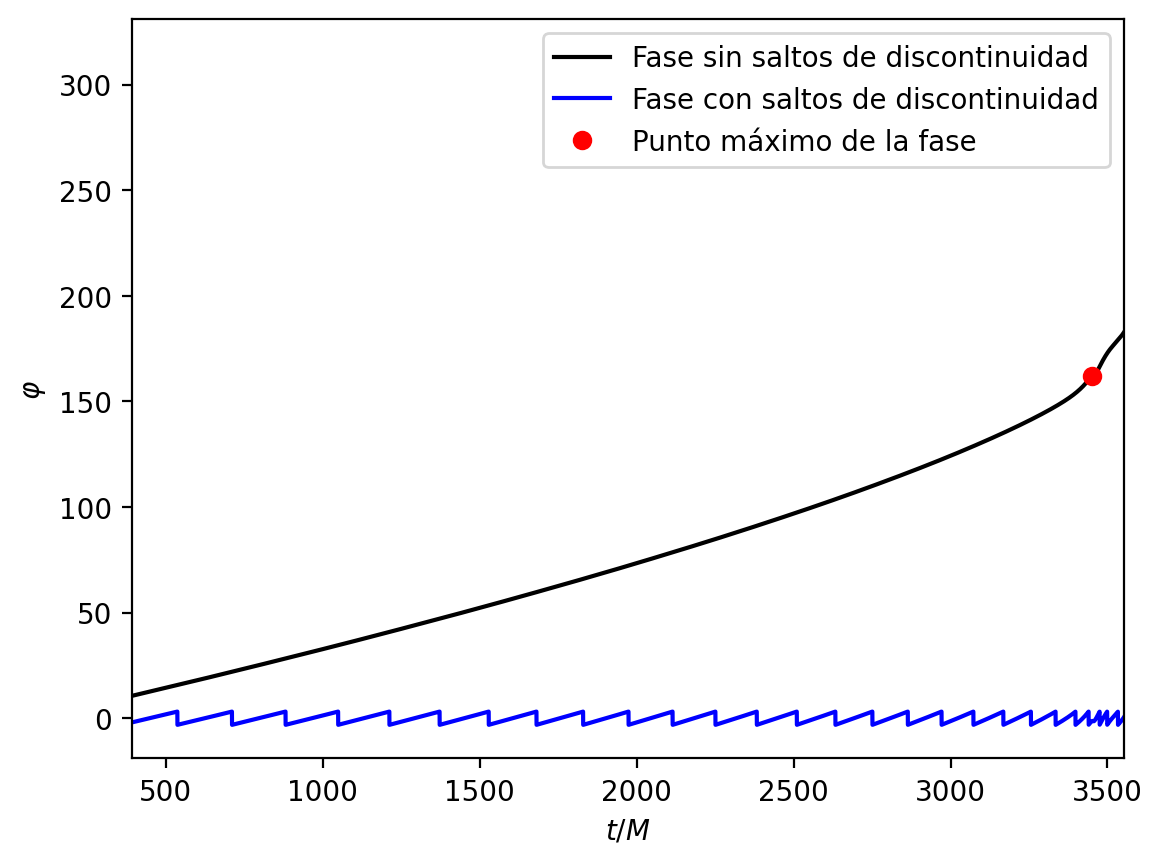

In [ ]:
#@title Gráfica de la fase obtenida con los datos del sistema

#Gráfica de la fase de la onda, se saca el ángulo de la misma y se grafica comparado al tiempo
plt.plot(w_2_2.t, np.unwrap(-phi), 'k', label = 'Fase sin saltos de discontinuidad') #el np.unwrap se encarga de eliminar los saltos de la fase
plt.plot(w_2_2.t, -phi, 'b', label = 'Fase con saltos de discontinuidad')
plt.plot(x_max, y_max, 'ro', label = 'Punto máximo de la fase')
plt.legend()
plt.xlabel(r'$t/M$')
plt.xlim(t0, x_max + 100) #Se limita el eje x para visualizar el intervalo de itere( se agrega el 100 para visualizar mejor el punto máximo)
plt.ylabel(r'$\varphi$')
plt.show()

In [ ]:
#Se crearon los valores t0 y el punto máximo de la fase para poder aplicar las distintas técnicas de interpolación
#sobre este intervalo es donde se va a interpolar, junto a una cantidad de pasos dentro del intervalo para tener un paso entre puntos constante.


In [ ]:
#@title Creación de los intervalos a trabajar

n_p = 600 #Número de pasos dentro del intervalo a trabajar para interpolar
t_pol = np.linspace(t0, x_max, n_p)

# El rol que cumple el t_pol comparado al t_interp es que el primero se encarga de comparar los valores obtenidos de la interpolación
# y el t_interp es la sección de los datos obtenidos en donde estamos trabajando o sea desde t0 hasta max.

#Se encuentran los indices que cumplen la condición que necesita el intervalo para poder interpolar
indices = np.where((w_2_2.t >= t0) & (w_2_2.t <= x_max))

# Se crean dos arrays que contienen los datos de la medición pero en el intervalo que necesitamos
#Lo que se hace es reducirlos a los que realmente necesitamos para poder comparar los valores junto a la interpolación obtenida
t_interp = np.array(w_2_2.t[indices])
w_interp = np.array(np.unwrap(np.angle(w_2_2[indices]))) # Se crean los arrays pero los tiempo y fases directamente, se usa el unwrap sobre el ángulo para evitar los saltos de la fase entre -pi y pi
#ya que la función np.angle solo devuelve valores entre -pi y pi por lo que no representa realmente la continuidad de la fase hasta su punto máximo.

print(f'La cantidad de valores en los datos del multipolo w_2_2 es {len(w_2_2)}')
print(f'La cantidad de valores en los datos restringidos por t0 y x_max es {len(w_interp)}')
print(f'El mínimo en los datos está dado por el t0 = {t0} y el máximo por x_max = {x_max}')

La cantidad de valores en los datos del multipolo w_2_2 es 11452
La cantidad de valores en los datos restringidos por t0 y x_max es 8568
El mínimo en los datos está dado por el t0 = 392 y el máximo por x_max = 3451.9494367561624


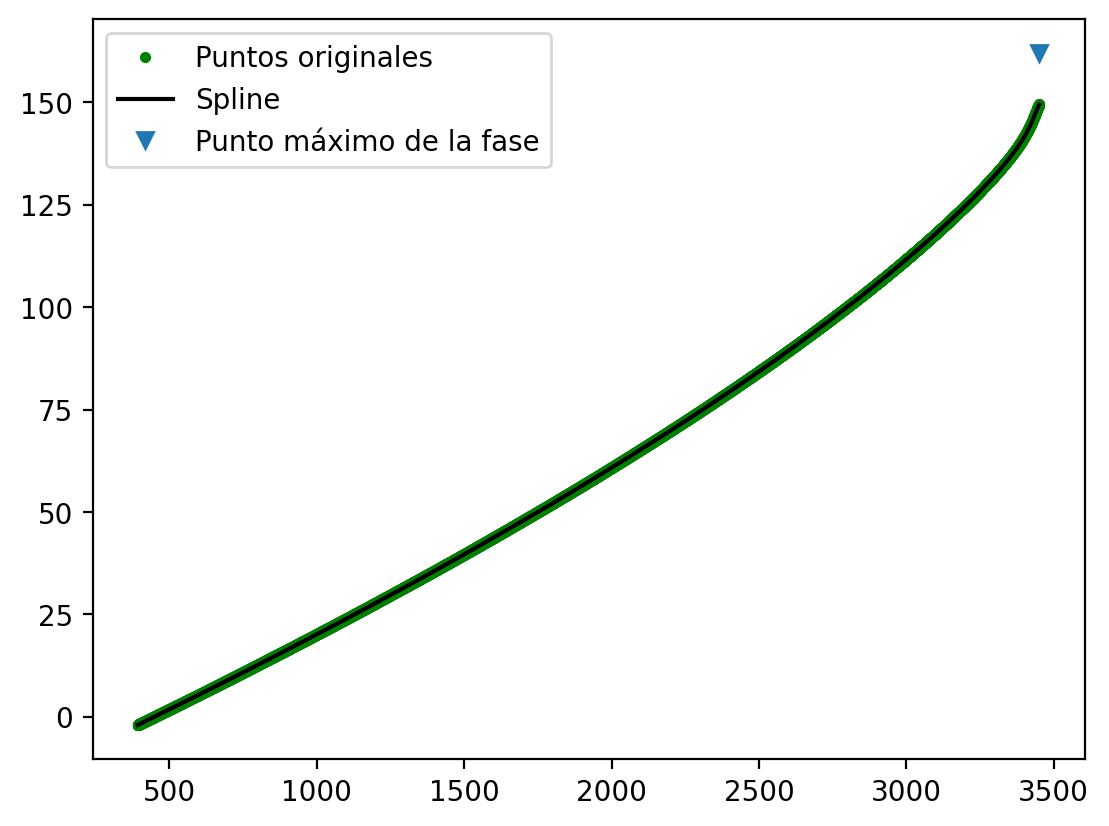

In [ ]:
#@title Cubic Spline natural

#Se crea el t_spline que contiene los valores de la primera interpolación
t_spline = CubicSpline(t_interp, w_interp, bc_type='natural')
#Este primer método de interpolación usa el 'natural' que significa que la segunda derivada es cero en la frontera.
#se grafican los valores obtenidos del método de interpolación junto a los puntos reales de la medición

plt.plot(t_interp, np.unwrap(-w_interp), 'g.', label = 'Puntos originales')
plt.plot(t_pol, np.unwrap(-t_spline(t_pol)), 'k', label = 'Spline')
plt.plot(x_max, y_max, 'v', label = 'Punto máximo de la fase')
plt.legend()
plt.show()

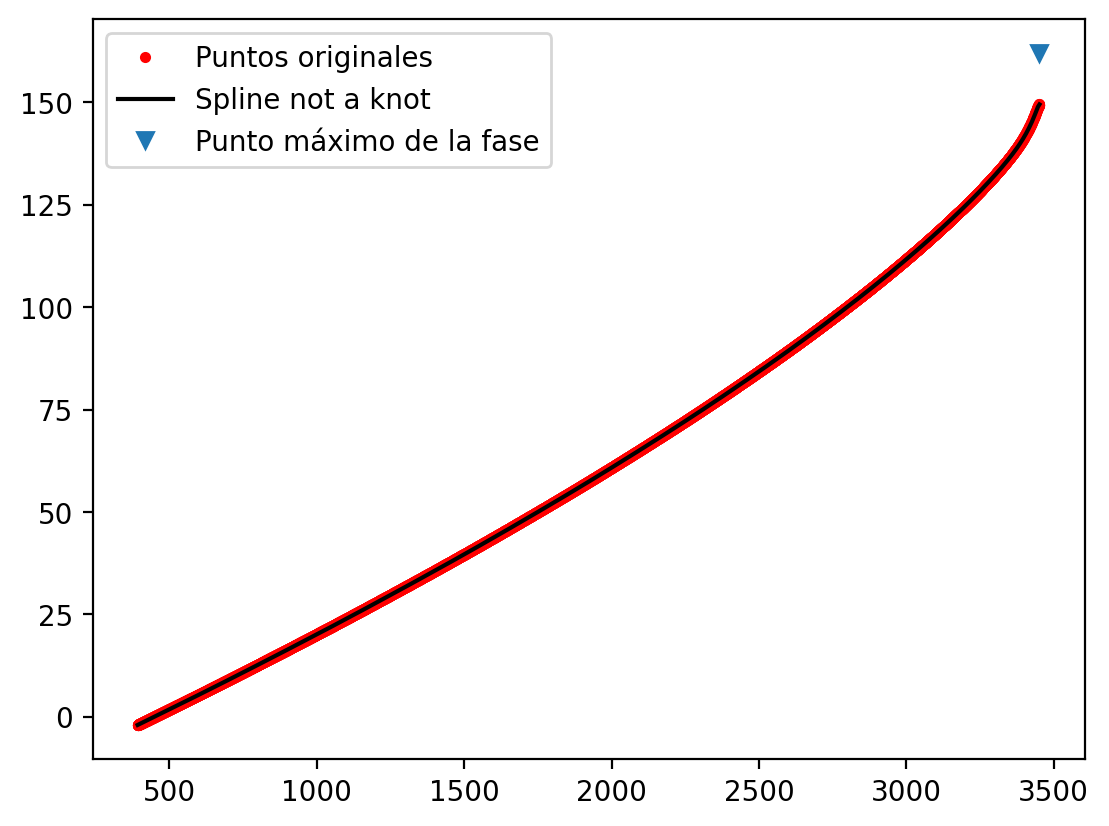

In [ ]:
#@title Cubic Spline usando not-a-knot

#El t_spline_k representa el cubic spline pero con la condición de not a knot que es la condición que se usa en automatico
t_spline_k = CubicSpline(t_interp, w_interp)
#En not a knot la primera y la segunda derivada son continuas, es el mismo polinomio
plt.plot(t_interp, np.unwrap(-w_interp), 'r.', label = 'Puntos originales')
plt.plot(t_pol, np.unwrap(-t_spline_k(t_pol)), 'k', label = 'Spline not a knot')
plt.plot(x_max, y_max, 'v', label = 'Punto máximo de la fase')
plt.legend()
plt.show()

#Se hace negra la técnica de interpolación para apreciar de mejor forma la proximidad entre gráficas

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

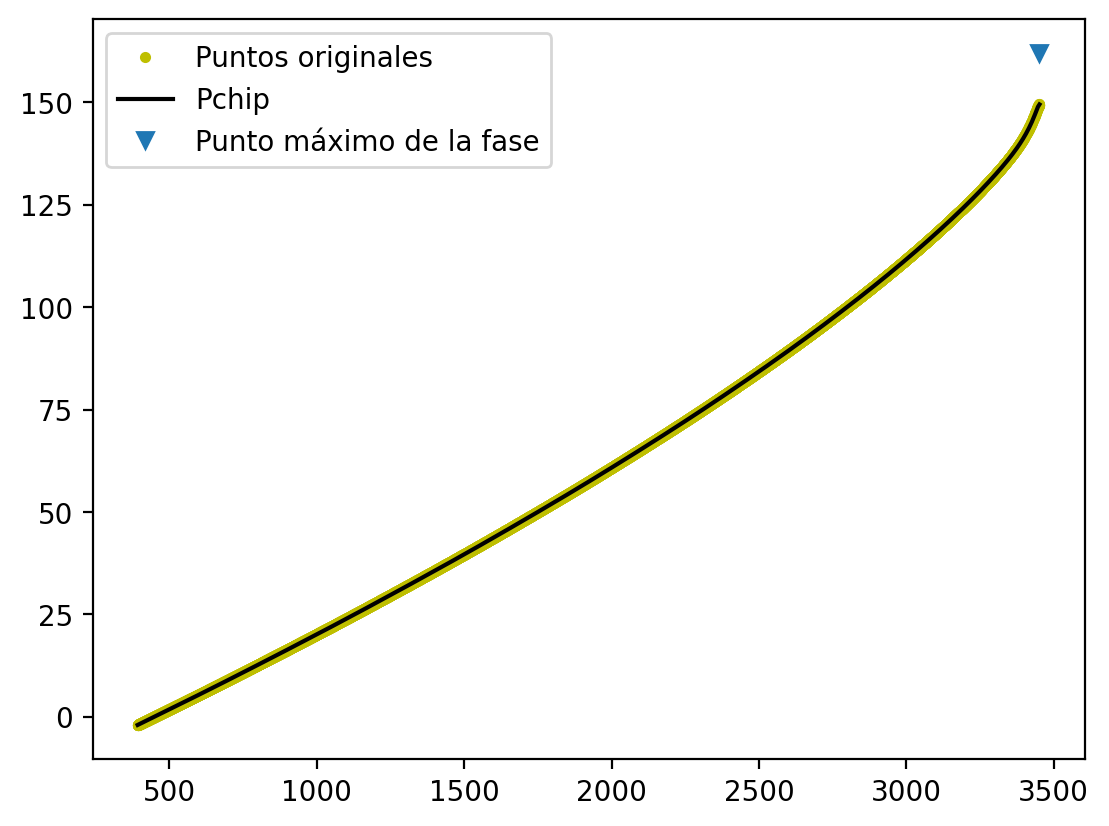

In [ ]:
#@title PchipInterpolator

t_pchip = PchipInterpolator(t_interp, w_interp)


plt.plot(t_interp, np.unwrap(-w_interp), 'y.', label = 'Puntos originales')
plt.plot(t_pol, np.unwrap(-t_pchip(t_pol)), 'k', label = 'Pchip')
plt.plot(x_max, y_max, 'v', label = 'Punto máximo de la fase')
plt.legend()
plt

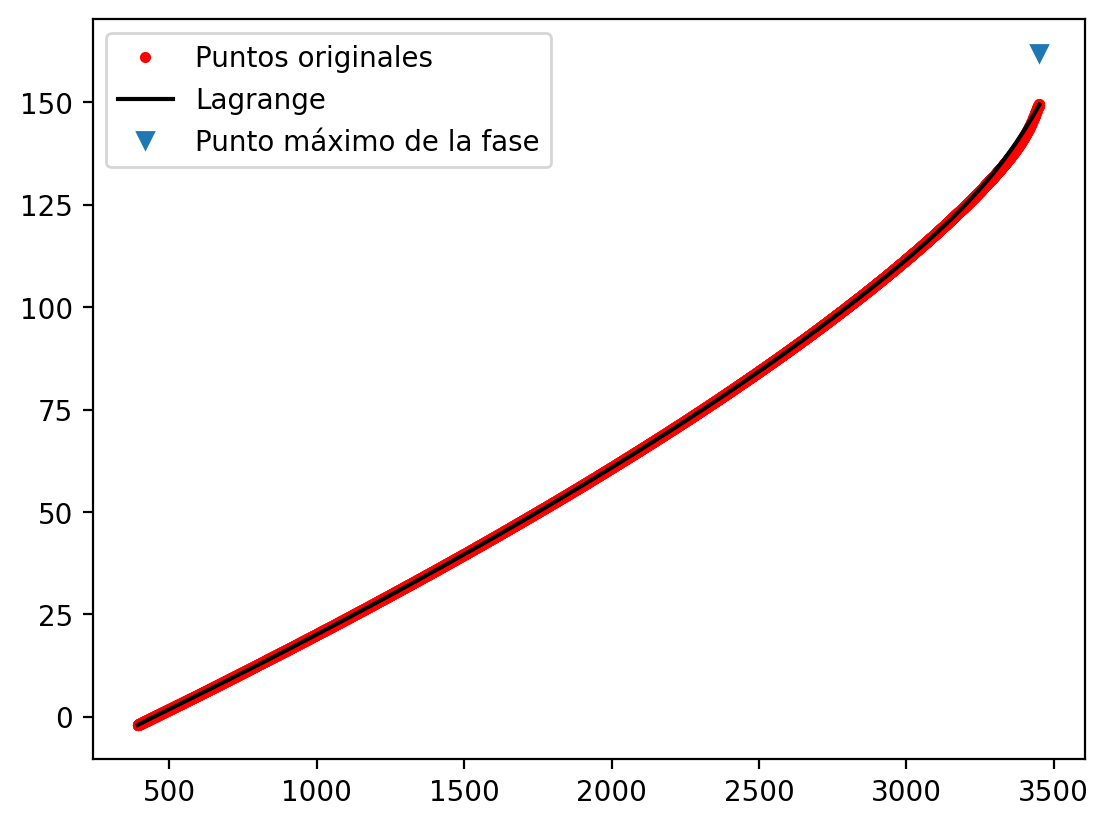

In [ ]:
#@title Lagrange interpolator
#Por la forma en que funciona lagrange, es mejor darle valores más pequeños y para que el código sea más eficiente se hizo una sección aparte solo para el funcionamiento de lagrange
num_points_lagrange = 10 # número de pasos en el que funciona lagrange (de 10 a 20)
indices_lagrange = np.linspace(1, len(t_interp) - 1, num_points_lagrange, dtype=int) #este indice se encarga de generar un array en donde cada valor es el indice que debe tomar los valores tiempo y fase
#se debe hacer un array distinto al que se tenía antes ya que los valores para lagrange son distintos, más pequeños por lo que es necesario hacer el proceso de nuevo.
t_lagrange_points = t_interp[indices_lagrange] # Valores de tiempo y fase para lagrange, siguiendo las iteraciones que dicta el indices para este método
w_lagrange_points = w_interp[indices_lagrange]


t_lagrange = lagrange(t_lagrange_points, w_lagrange_points)


#se grafican los resultados y poniendo un signo negativo para que la gráfica sea de mejor interpretación, se vea como un crecimiento a lo largo del tiempo.
plt.plot(t_interp, -w_interp, 'r.', label = 'Puntos originales') # Plot w_interp directly as it's already unwrapped
plt.plot(t_pol, -t_lagrange(t_pol), 'k', label = 'Lagrange') # Plot the interpolated values
plt.plot(x_max, y_max, 'v', label = 'Punto máximo de la fase')
plt.legend()
plt.show()



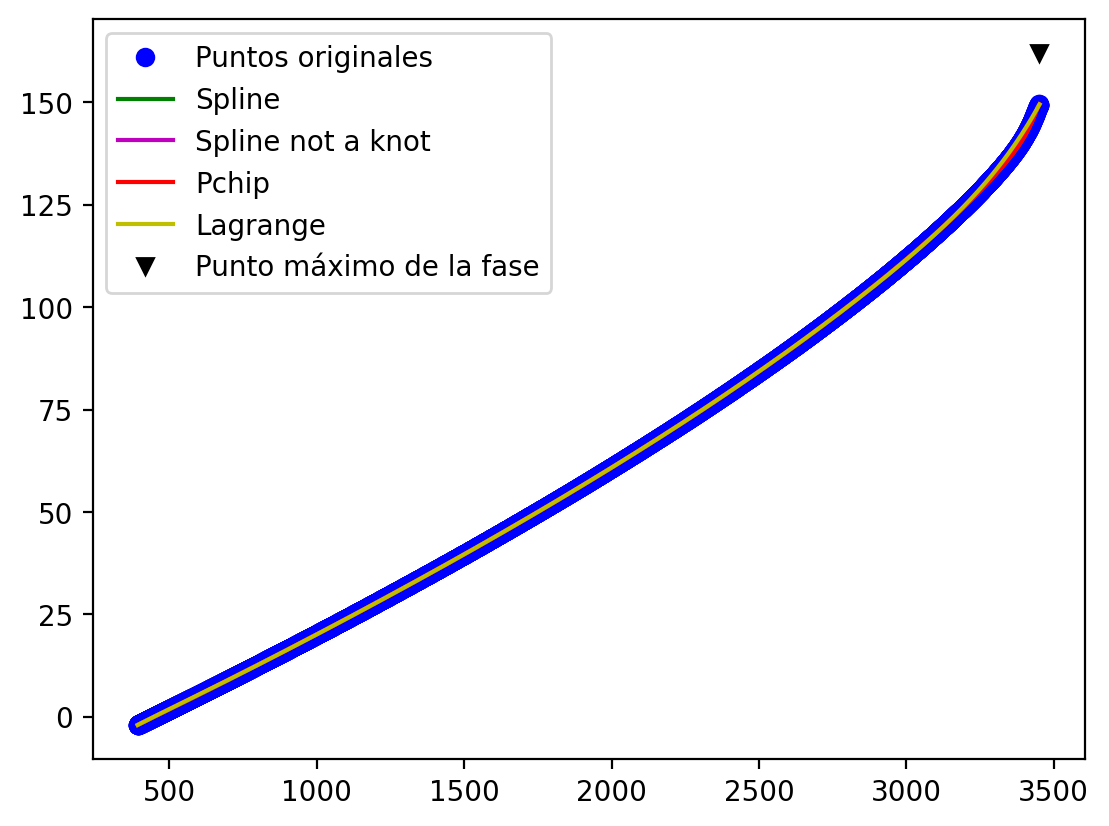

In [ ]:
#@title Comparación de los métodos de interpolación
#Los métodos spline normal, spline not a knot practicamente se superponen


plt.plot(t_interp, np.unwrap(-w_interp), 'bo', label = 'Puntos originales')
plt.plot(t_pol, np.unwrap(-t_spline(t_pol)), 'g', label = 'Spline')
plt.plot(t_pol, np.unwrap(-t_spline_k(t_pol)), 'm', label = 'Spline not a knot')
plt.plot(t_pol, np.unwrap(-t_pchip(t_pol)), 'r', label = 'Pchip')
plt.plot(t_pol, -t_lagrange(t_pol), 'y', label = 'Lagrange')
plt.plot(x_max, y_max, 'kv', label = 'Punto máximo de la fase')
plt.legend()
plt.show()

In [ ]:
#@title Grupos de Entrenamiento y de Prueba

t_train = t_interp[::300]
w_train = w_interp[::300]
t_test= t_interp[150::300]
w_test = w_interp[150::300]

print(len(t_train))
print(len(w_train))
print(len(t_test))

29
29
29


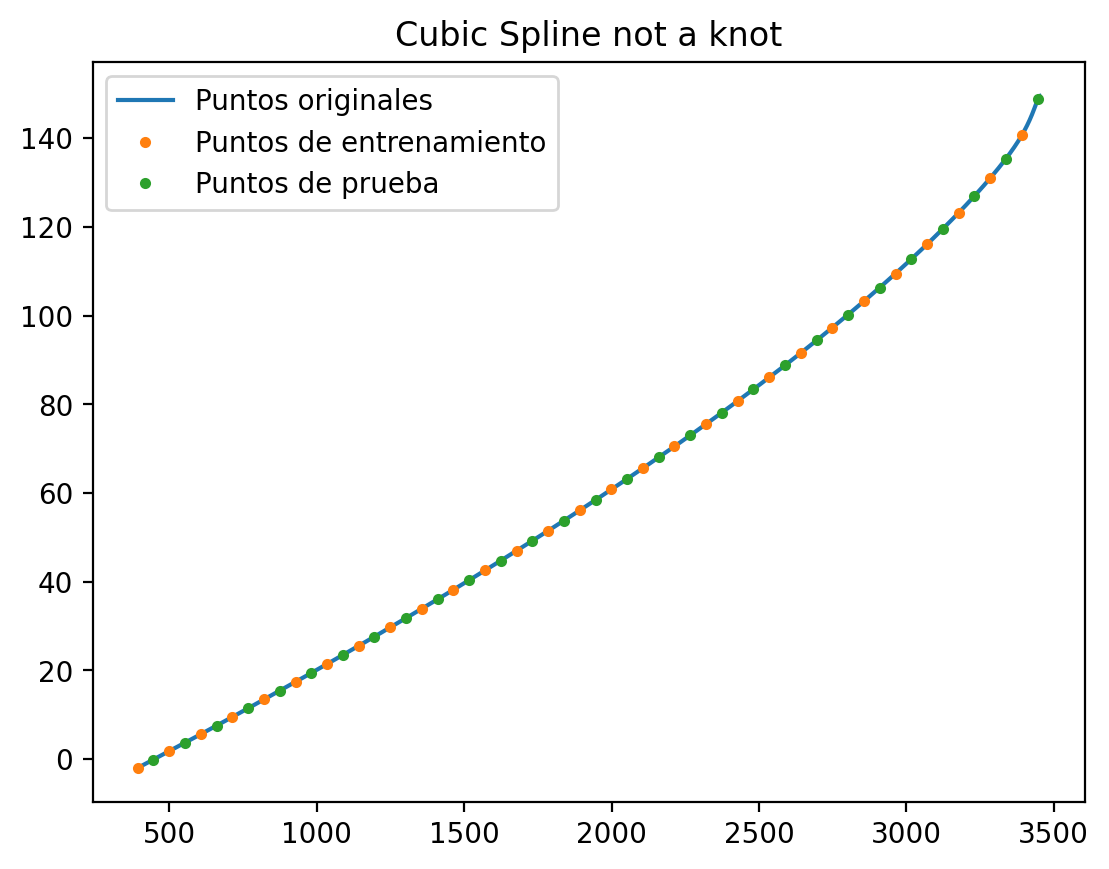

In [ ]:
#@title Cubic Spline - Not a Knot

train_cubicspline_k = CubicSpline(t_train, w_train)

plt.plot(t_interp, -w_interp, '-', label = 'Puntos originales')
plt.plot(t_train, -train_cubicspline_k(t_train), '.', label = 'Puntos de entrenamiento')
plt.plot(t_test, -w_test, '.', label = 'Puntos de prueba')
plt.title('Cubic Spline not a knot')
plt.legend()
plt.show()

Cubic spline → MAE=8.022838e-02 | MSE=1.607373e-01


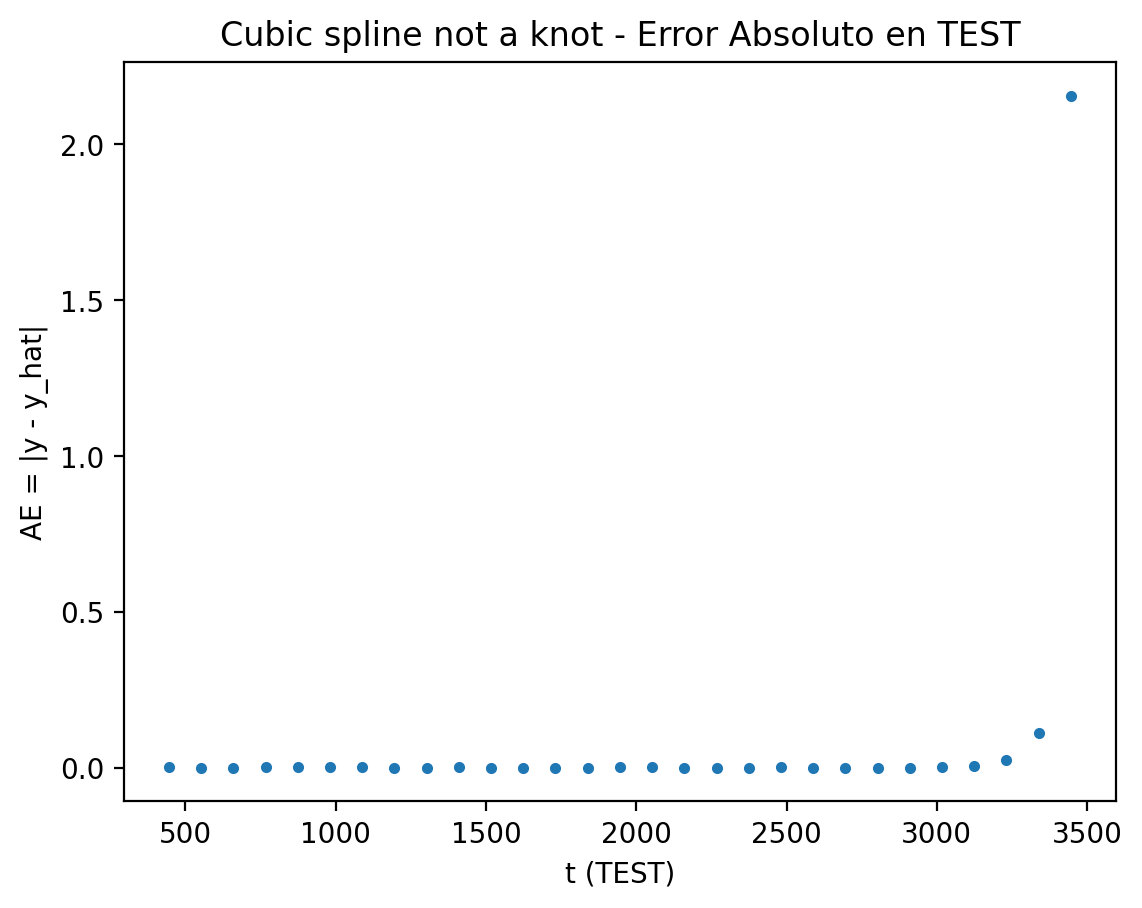

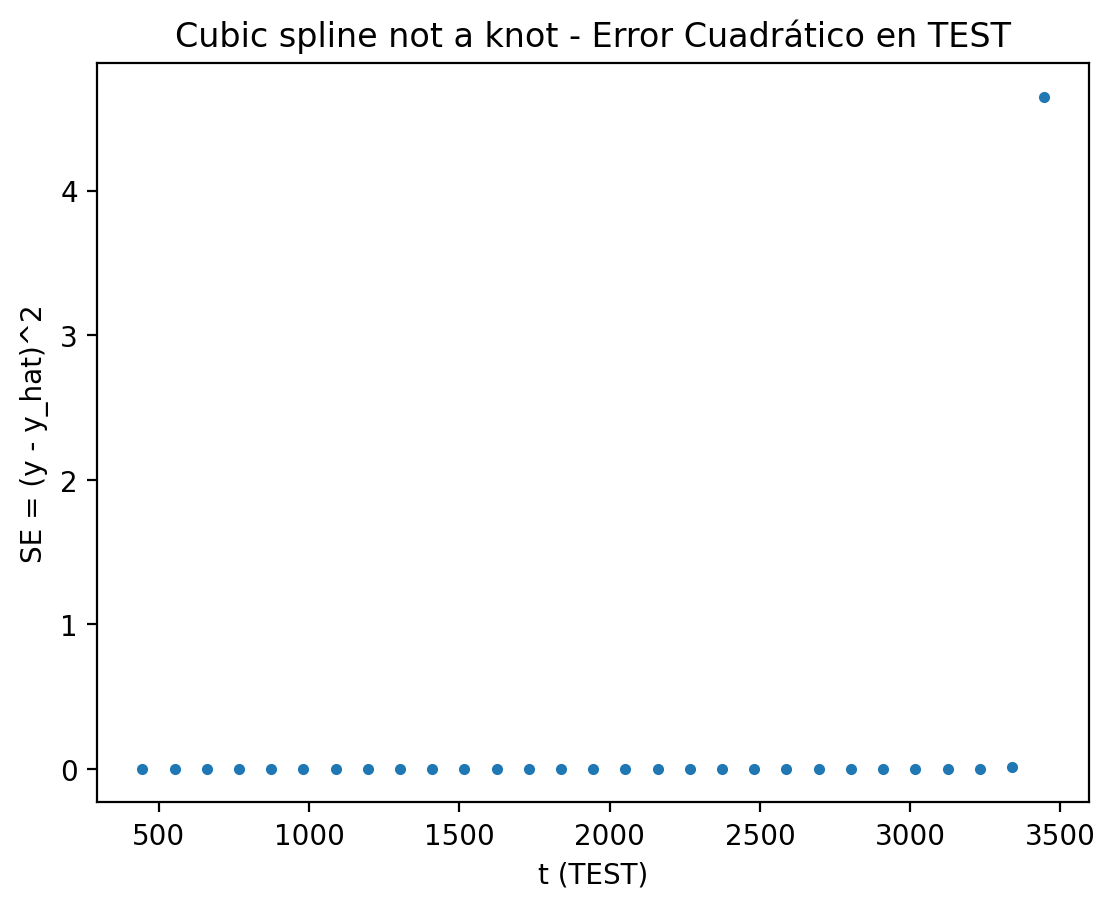

In [ ]:
#Errores para Cubic Spline K

# ===== 1) Predicciones en el conjunto de prueba =====
y_hat_cubick= train_cubicspline_k(t_test)

# ===== 2) Errores punto a punto =====
ae_cubick = np.abs(y_hat_cubick - w_test)  # Absolute Error (AE)
se_cubick = (y_hat_cubick - w_test)**2     # Squared Error (SE)

# ===== 3) Métricas globales =====
MAE_cubick = float(np.mean(ae_cubick))
MSE_cubick = float(np.mean(se_cubick))

print(f"Cubic spline → MAE={MAE_cubick:.6e} | MSE={MSE_cubick:.6e}")

# ===== 4) Gráficas de los errores =====
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t_test, ae_cubick, "o", ms=3)
plt.xlabel("t (TEST)")
plt.ylabel("AE = |y - y_hat|")
plt.title("Cubic spline not a knot - Error Absoluto en TEST")
plt.show()

plt.figure()
plt.plot(t_test, se_cubick, "o", ms=3)
plt.xlabel("t (TEST)")
plt.ylabel("SE = (y - y_hat)^2")
plt.title("Cubic spline not a knot - Error Cuadrático en TEST")
plt.show()


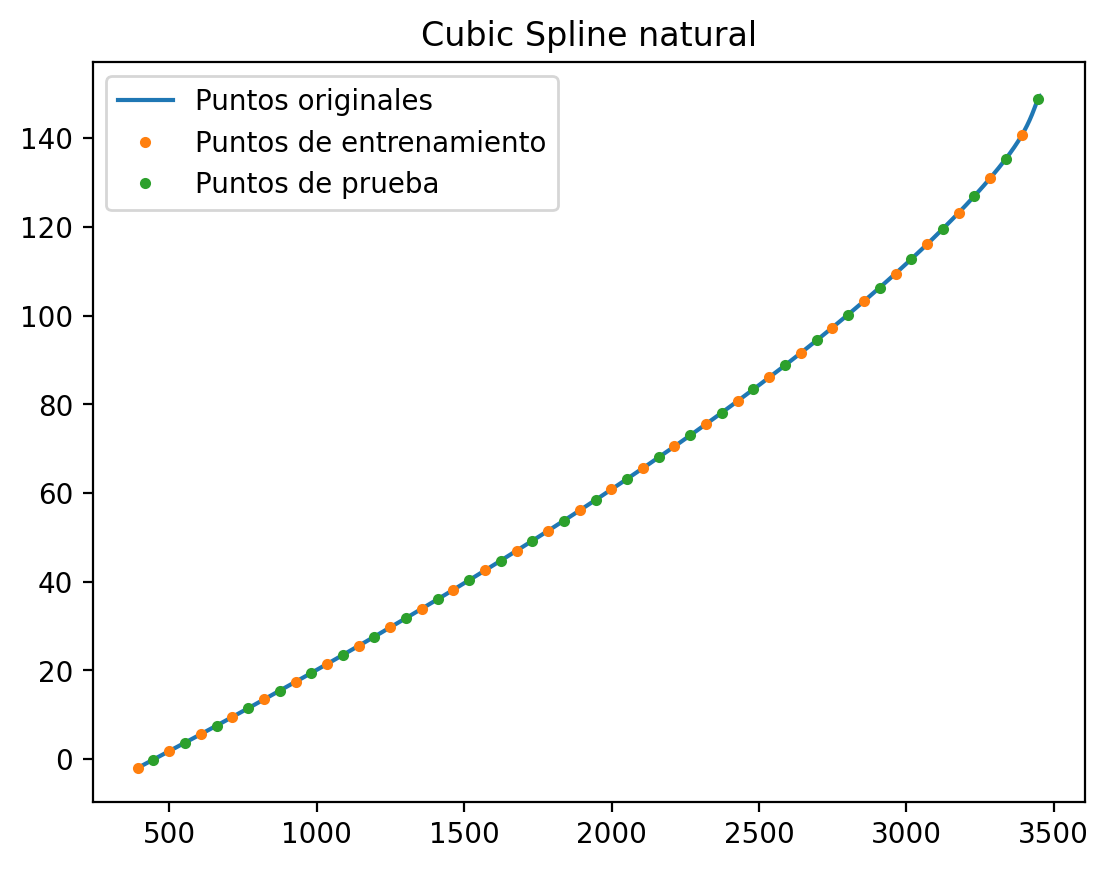

In [ ]:
#@title Cubic Spline - Natural

train_cubicspline_n = CubicSpline(t_train, w_train, bc_type="natural")

plt.plot(t_interp, -w_interp, '-', label = 'Puntos originales')
plt.plot(t_train, -train_cubicspline_n(t_train), '.', label = 'Puntos de entrenamiento')
plt.plot(t_test, -w_test, '.', label = 'Puntos de prueba')
plt.title('Cubic Spline natural')
plt.legend()
plt.show()

Cubic spline → MAE=1.194801e-01 | MSE=3.330335e-01


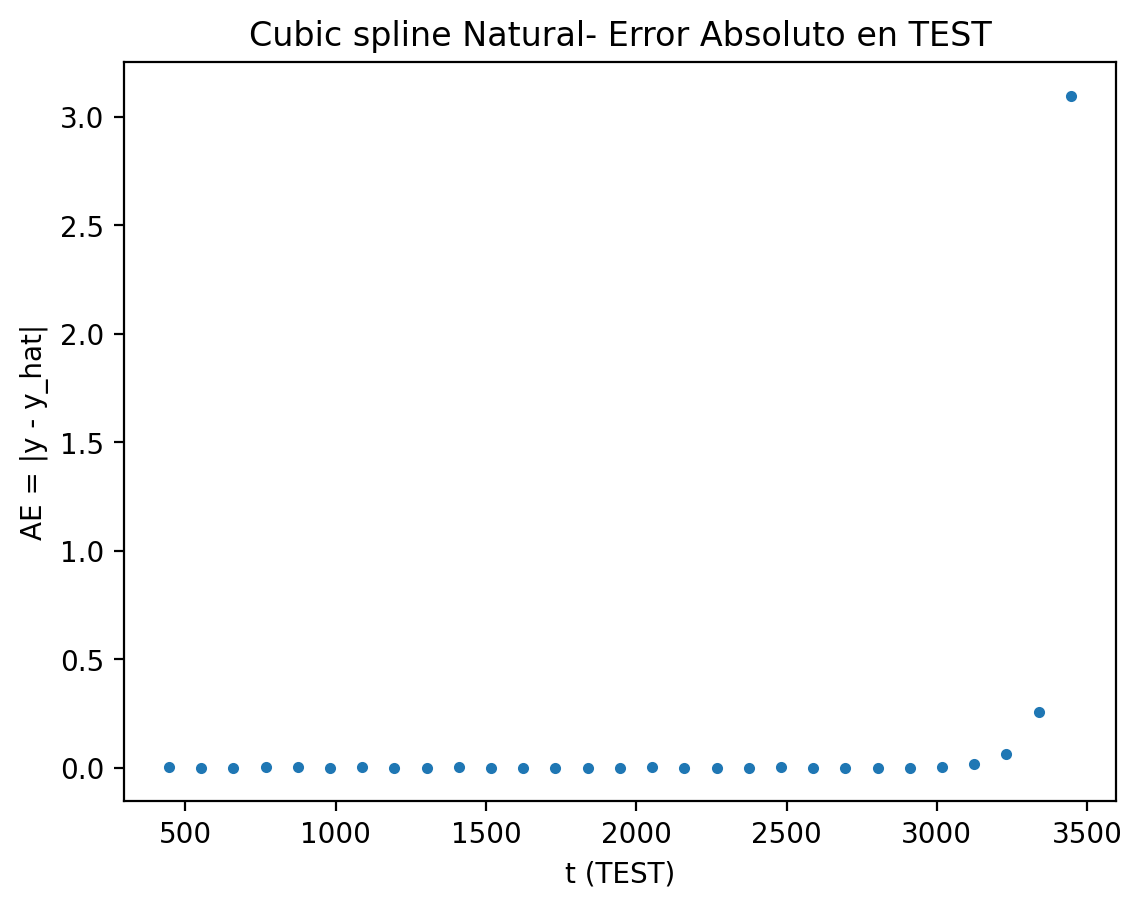

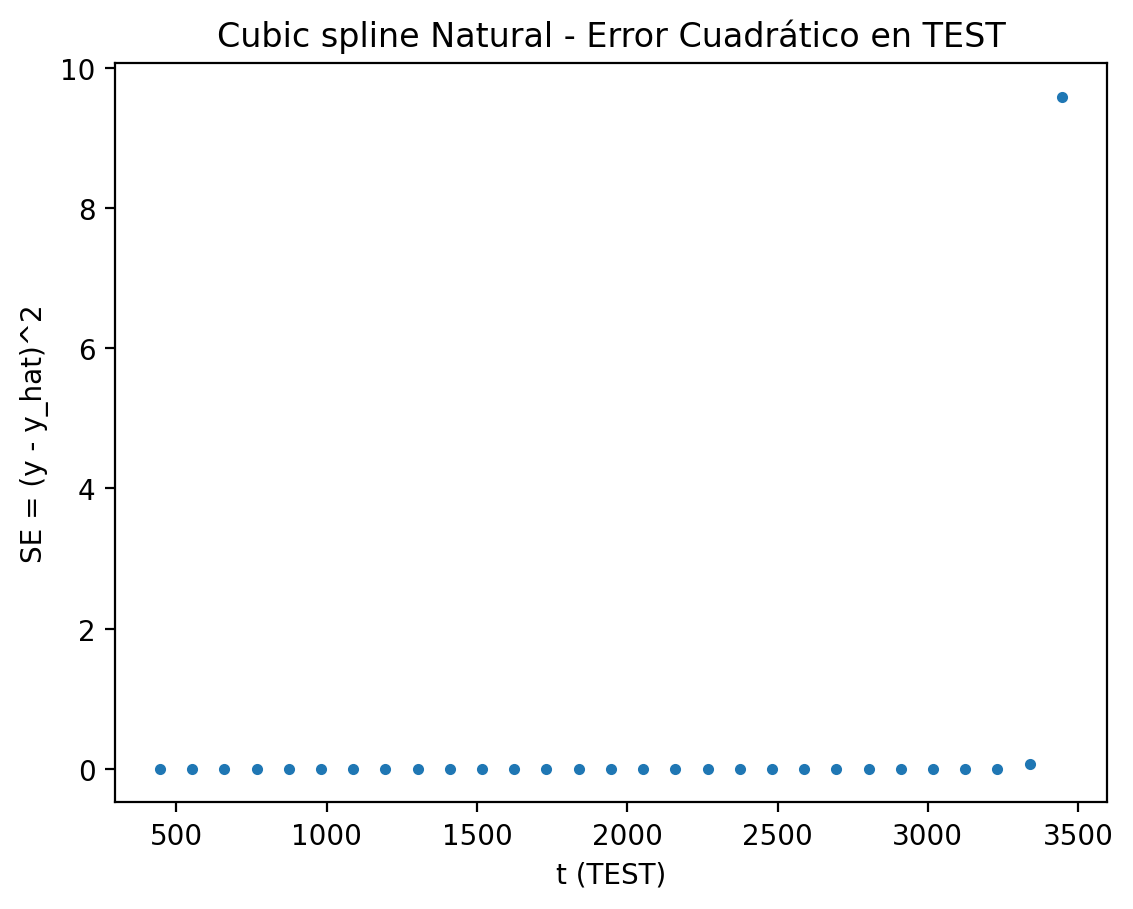

In [ ]:
#Errores para Cubic Spline Natural

# ===== 1) Predicciones en el conjunto de prueba =====
y_hat_cubic= train_cubicspline_n(t_test)

# ===== 2) Errores punto a punto =====
ae_cubic = np.abs(y_hat_cubic - w_test)  # Absolute Error (AE)
se_cubic = (y_hat_cubic - w_test)**2     # Squared Error (SE)

# ===== 3) Métricas globales =====
MAE_cubic = float(np.mean(ae_cubic))
MSE_cubic = float(np.mean(se_cubic))

print(f"Cubic spline → MAE={MAE_cubic:.6e} | MSE={MSE_cubic:.6e}")

# ===== 4) Gráficas de los errores =====
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t_test, ae_cubic, "o", ms=3)
plt.xlabel("t (TEST)")
plt.ylabel("AE = |y - y_hat|")
plt.title("Cubic spline Natural- Error Absoluto en TEST")
plt.show()

plt.figure()
plt.plot(t_test, se_cubic, "o", ms=3)
plt.xlabel("t (TEST)")
plt.ylabel("SE = (y - y_hat)^2")
plt.title("Cubic spline Natural - Error Cuadrático en TEST")
plt.show()


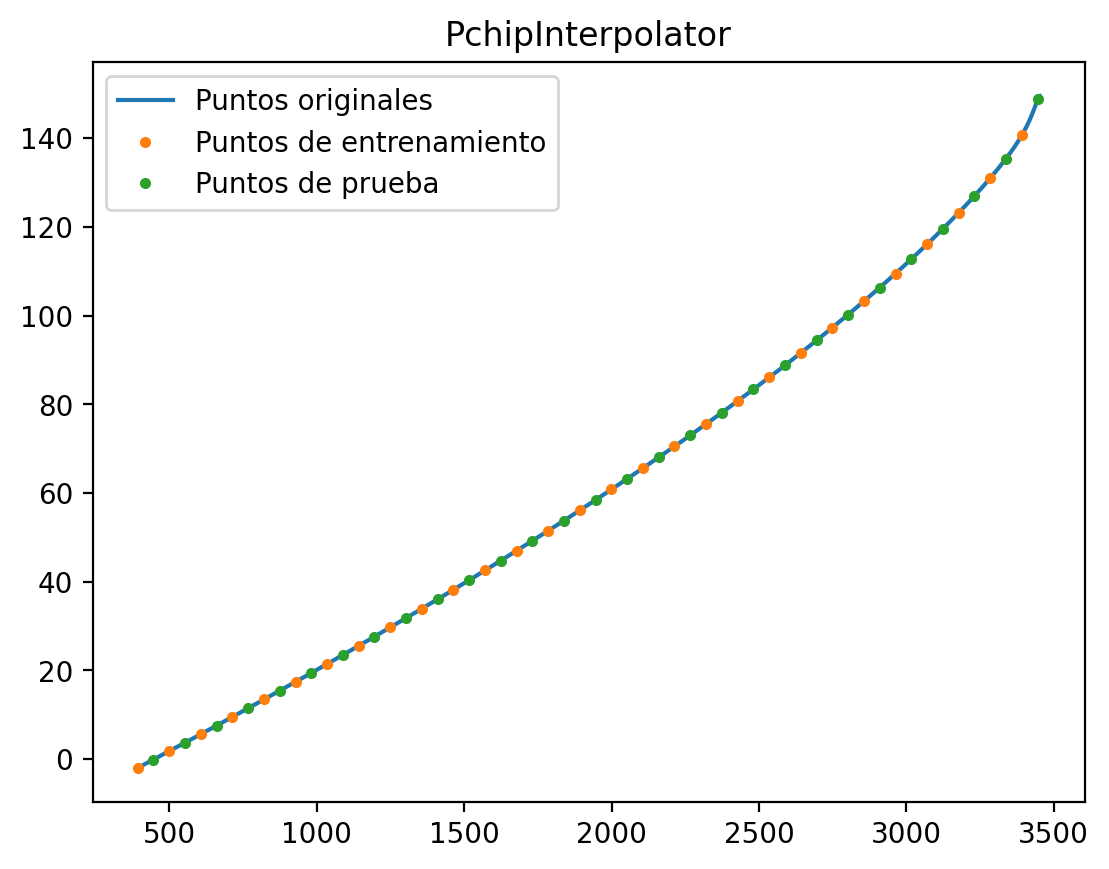

In [ ]:
#@title PchipInterpolator

train_pchip = PchipInterpolator(t_train, w_train)

plt.plot(t_interp, -w_interp, '-', label = 'Puntos originales')
plt.plot(t_train, -train_pchip(t_train), '.', label = 'Puntos de entrenamiento')
plt.plot(t_test, -w_test, '.', label = 'Puntos de prueba')
plt.title('PchipInterpolator')
plt.legend()
plt.show()

Cubic spline → MAE=9.854779e-02 | MSE=2.357804e-01


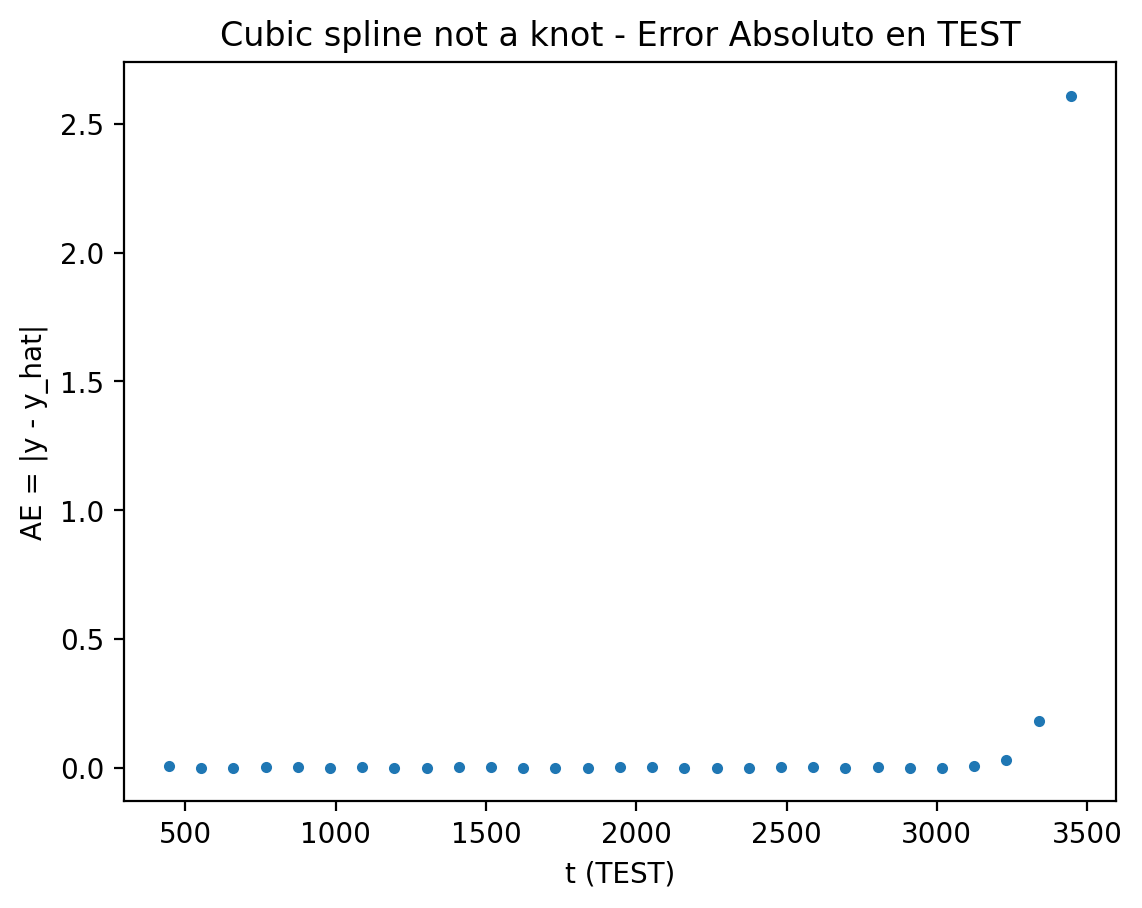

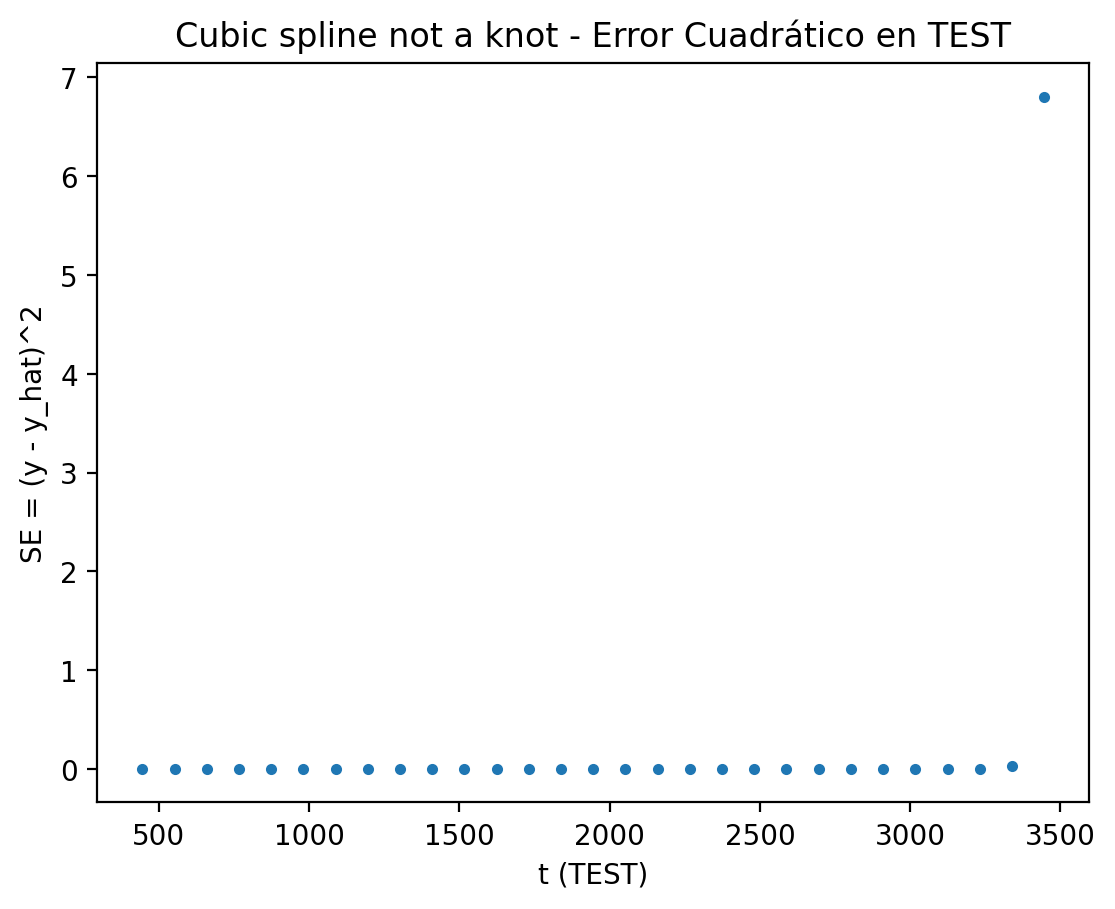

In [ ]:
#Errores para PchipInterpolator

# ===== 1) Predicciones en el conjunto de prueba =====
y_hat_interp= train_pchip(t_test)

# ===== 2) Errores punto a punto =====
ae_interp = np.abs(y_hat_interp - w_test)  # Absolute Error (AE)
se_interp = (y_hat_interp - w_test)**2     # Squared Error (SE)

# ===== 3) Métricas globales =====
MAE_interp = float(np.mean(ae_interp))
MSE_interp = float(np.mean(se_interp))

print(f"Cubic spline → MAE={MAE_interp:.6e} | MSE={MSE_interp:.6e}")

# ===== 4) Gráficas de los errores =====
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t_test, ae_interp, "o", ms=3)
plt.xlabel("t (TEST)")
plt.ylabel("AE = |y - y_hat|")
plt.title("Cubic spline not a knot - Error Absoluto en TEST")
plt.show()

plt.figure()
plt.plot(t_test, se_interp, "o", ms=3)
plt.xlabel("t (TEST)")
plt.ylabel("SE = (y - y_hat)^2")
plt.title("Cubic spline not a knot - Error Cuadrático en TEST")
plt.show()


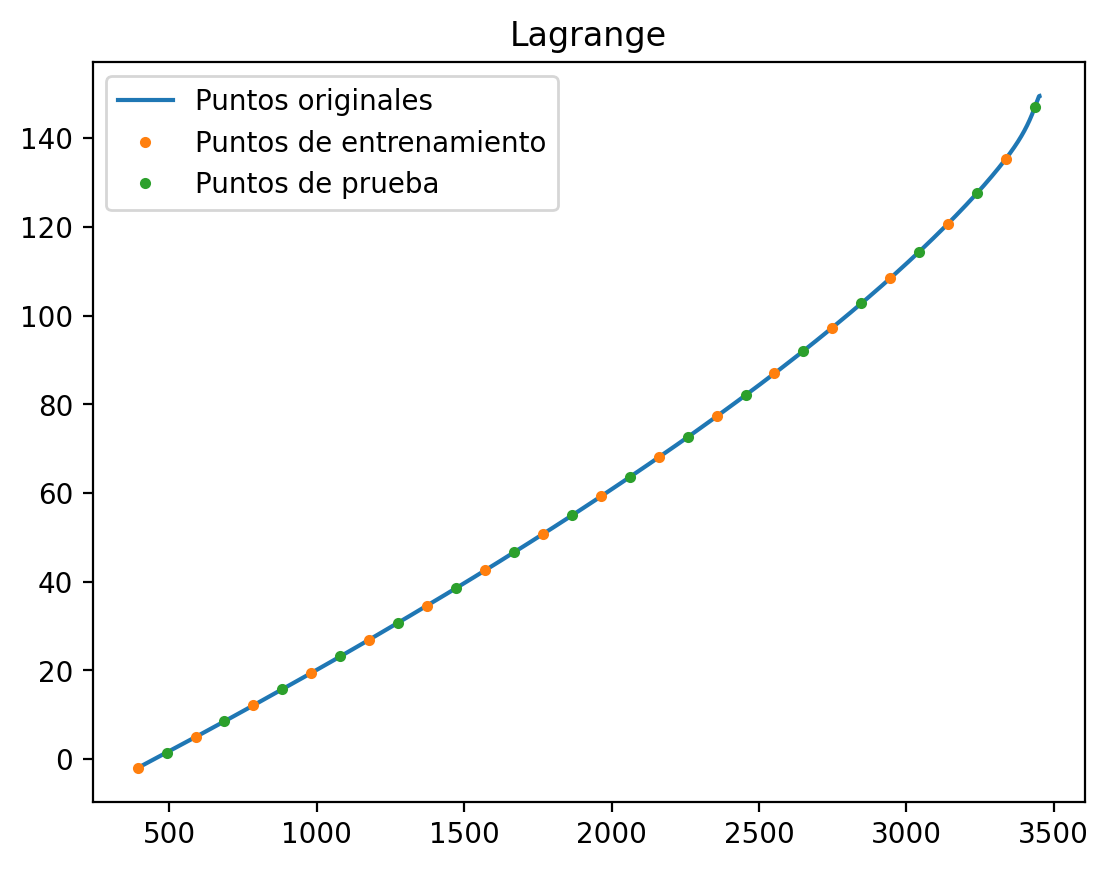

In [ ]:
#@title Lagrange

t_train_lagrange = t_interp[::550]
w_train_lagrange = w_interp[::550]
t_test_lagrange = t_interp[275::550]
w_test_lagrange = w_interp[275::550]

train_lagrange = lagrange(t_train_lagrange, w_train_lagrange)

plt.plot(t_interp, -w_interp, '-', label = 'Puntos originales')
plt.plot(t_train_lagrange, -w_train_lagrange, '.', label = 'Puntos de entrenamiento')
plt.plot(t_test_lagrange, -w_test_lagrange, '.', label = 'Puntos de prueba')
plt.title('Lagrange')
plt.legend()
plt.show()

Lagrange → MAE=7.250078e-01 | MSE=6.880413e+00


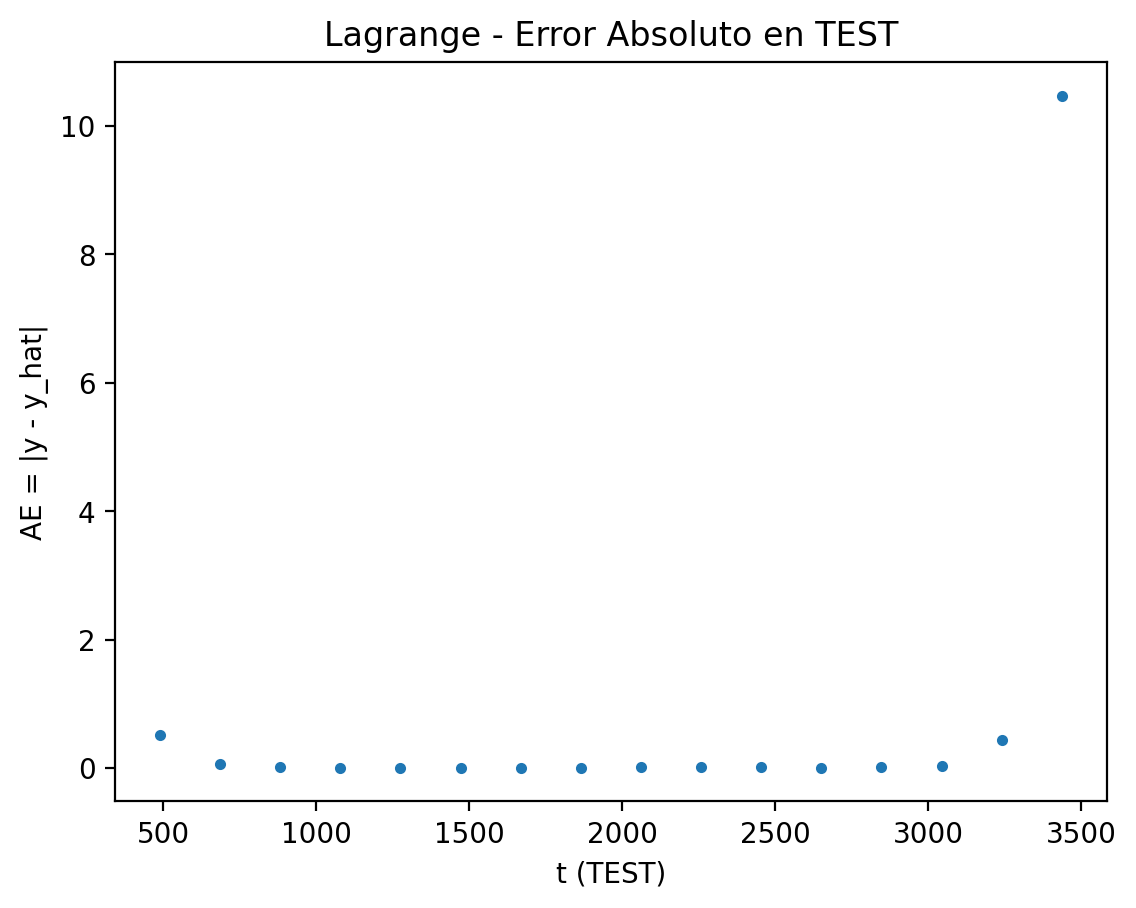

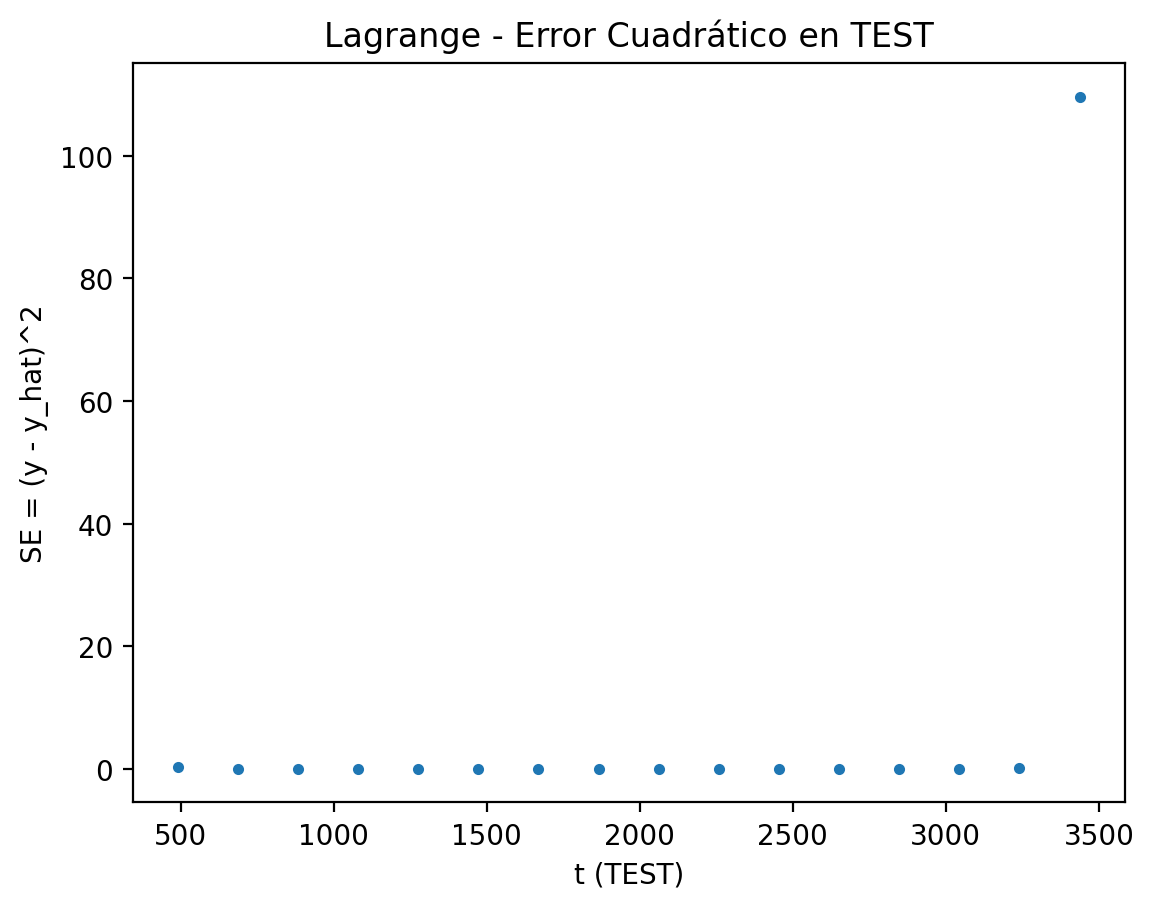

In [ ]:
#Errores para Lagrange


# ===== 1) Predicciones en el conjunto de prueba =====
y_hat_lagrange = train_lagrange(t_test_lagrange)

# ===== 2) Errores punto a punto =====
ae_lagrange = np.abs(y_hat_lagrange - w_test_lagrange)  # Absolute Error (AE)
se_lagrange = (y_hat_lagrange - w_test_lagrange)**2     # Squared Error (SE)

# ===== 3) Métricas globales =====
MAE_lagrange = float(np.mean(ae_lagrange))
MSE_lagrange = float(np.mean(se_lagrange))

print(f"Lagrange → MAE={MAE_lagrange:.6e} | MSE={MSE_lagrange:.6e}")

# ===== 4) Gráficas de los errores =====
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t_test_lagrange, ae_lagrange, "o", ms=3)
plt.xlabel("t (TEST)")
plt.ylabel("AE = |y - y_hat|")
plt.title("Lagrange - Error Absoluto en TEST")
plt.show()

plt.figure()
plt.plot(t_test_lagrange, se_lagrange, "o", ms=3)
plt.xlabel("t (TEST)")
plt.ylabel("SE = (y - y_hat)^2")
plt.title("Lagrange - Error Cuadrático en TEST")
plt.show()


In [ ]:
#@title Grupos de Entrenamiento y de Prueba con mas datos

t_train2 = t_interp[::2]
w_train2 = w_interp[::2]
t_test2= t_interp[1::2]
w_test2 = w_interp[1::2]


Cubic spline → MAE=2.276109e-02 | MSE=2.871046e-02


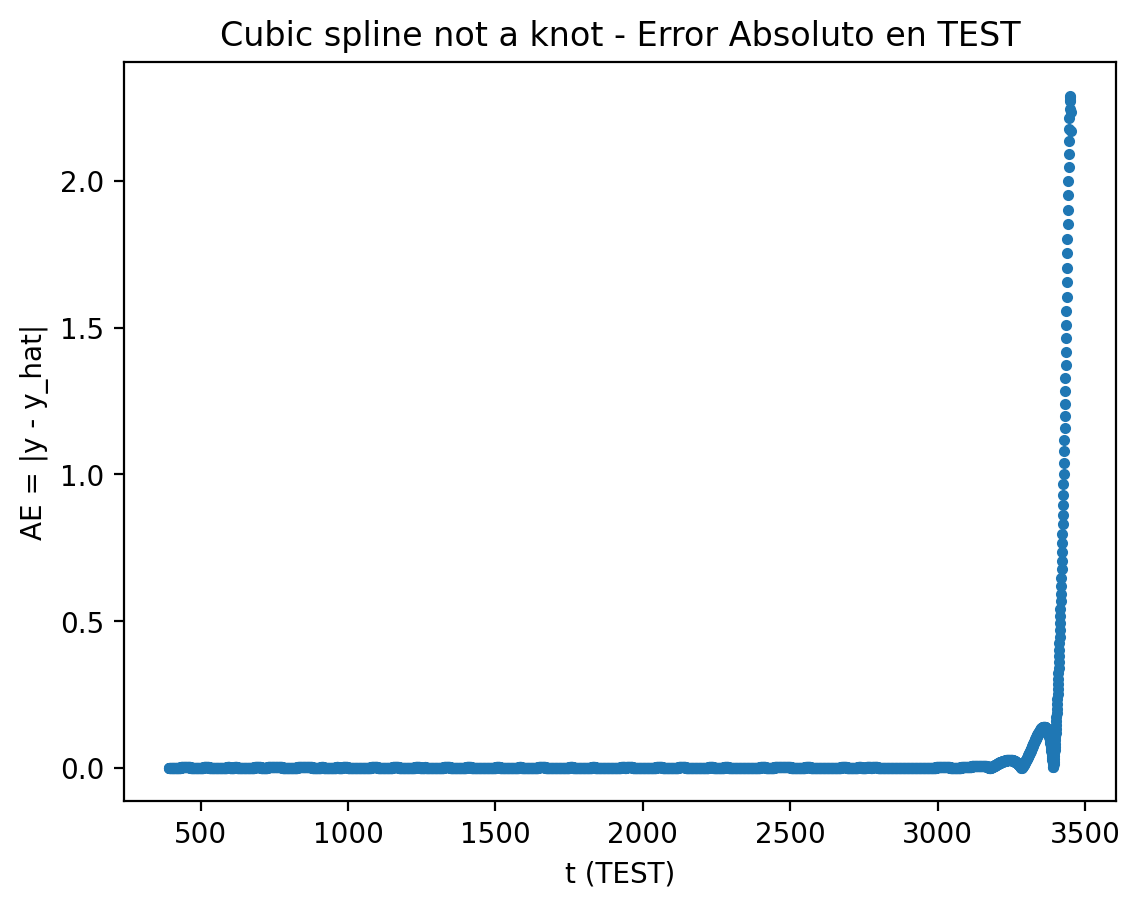

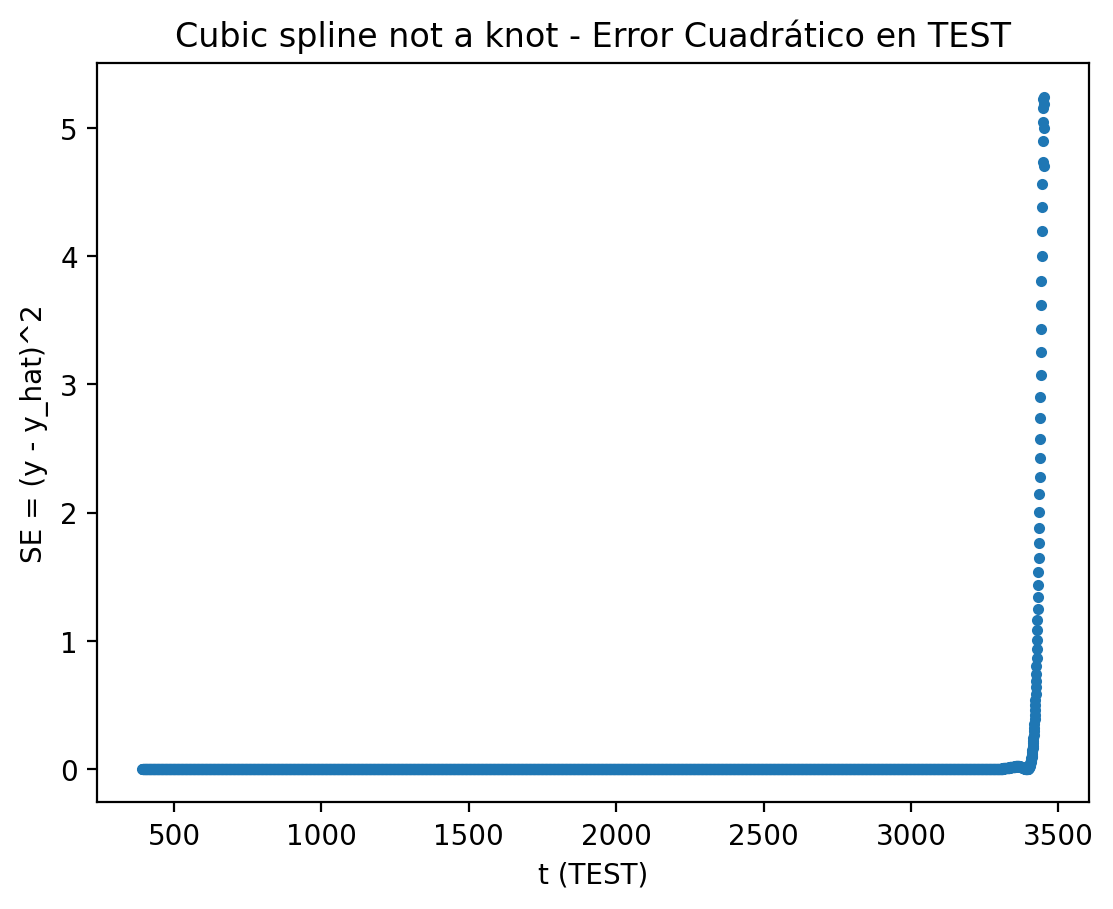

In [ ]:
#Errores para Cubic Spline K

# ===== 1) Predicciones en el conjunto de prueba =====
y_hat_cubick= train_cubicspline_k(t_test2)

# ===== 2) Errores punto a punto =====
ae_cubick = np.abs(y_hat_cubick - w_test2)  # Absolute Error (AE)
se_cubick = (y_hat_cubick - w_test2)**2     # Squared Error (SE)

# ===== 3) Métricas globales =====
MAE_cubick = float(np.mean(ae_cubick))
MSE_cubick = float(np.mean(se_cubick))

print(f"Cubic spline → MAE={MAE_cubick:.6e} | MSE={MSE_cubick:.6e}")

# ===== 4) Gráficas de los errores =====
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t_test2, ae_cubick, "o", ms=3)
plt.xlabel("t (TEST)")
plt.ylabel("AE = |y - y_hat|")
plt.title("Cubic spline not a knot - Error Absoluto en TEST")
plt.show()

plt.figure()
plt.plot(t_test2, se_cubick, "o", ms=3)
plt.xlabel("t (TEST)")
plt.ylabel("SE = (y - y_hat)^2")
plt.title("Cubic spline not a knot - Error Cuadrático en TEST")
plt.show()


Cubic spline → MAE=3.625115e-02 | MSE=6.229195e-02


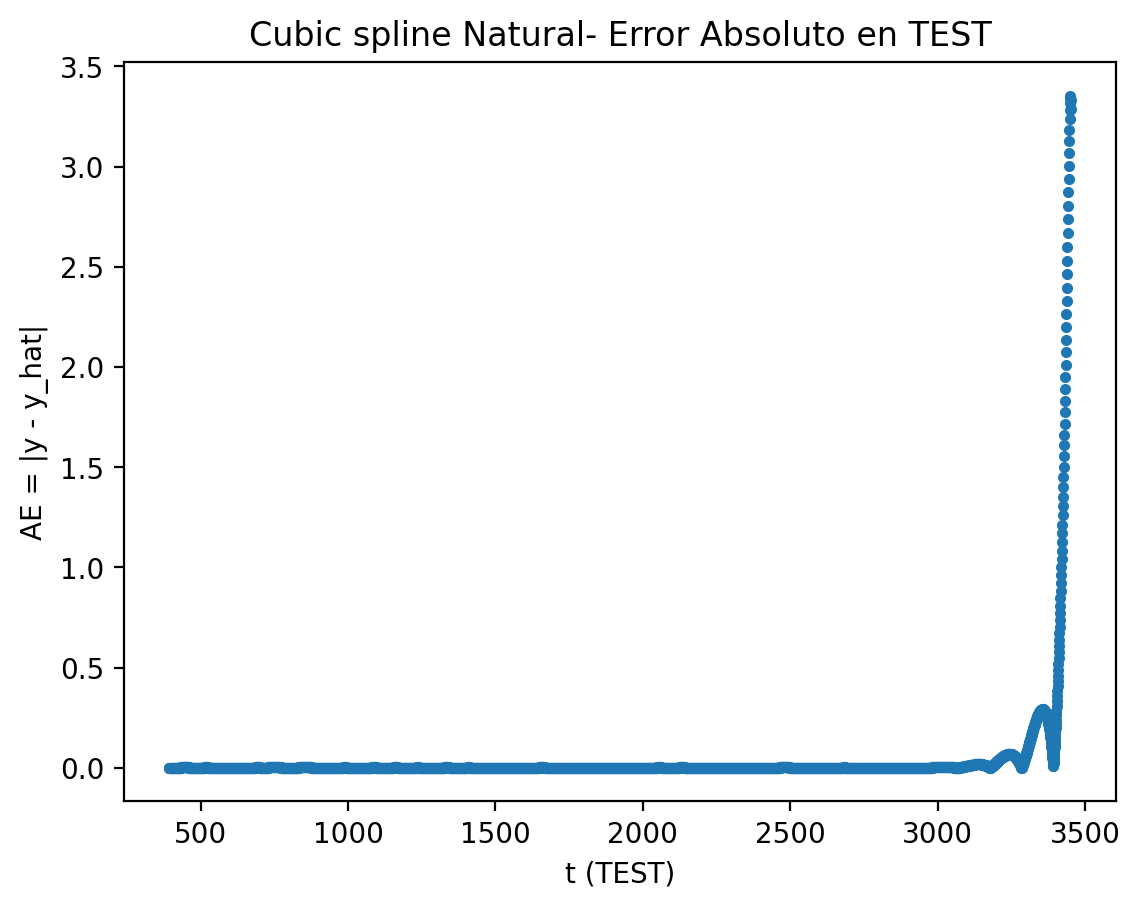

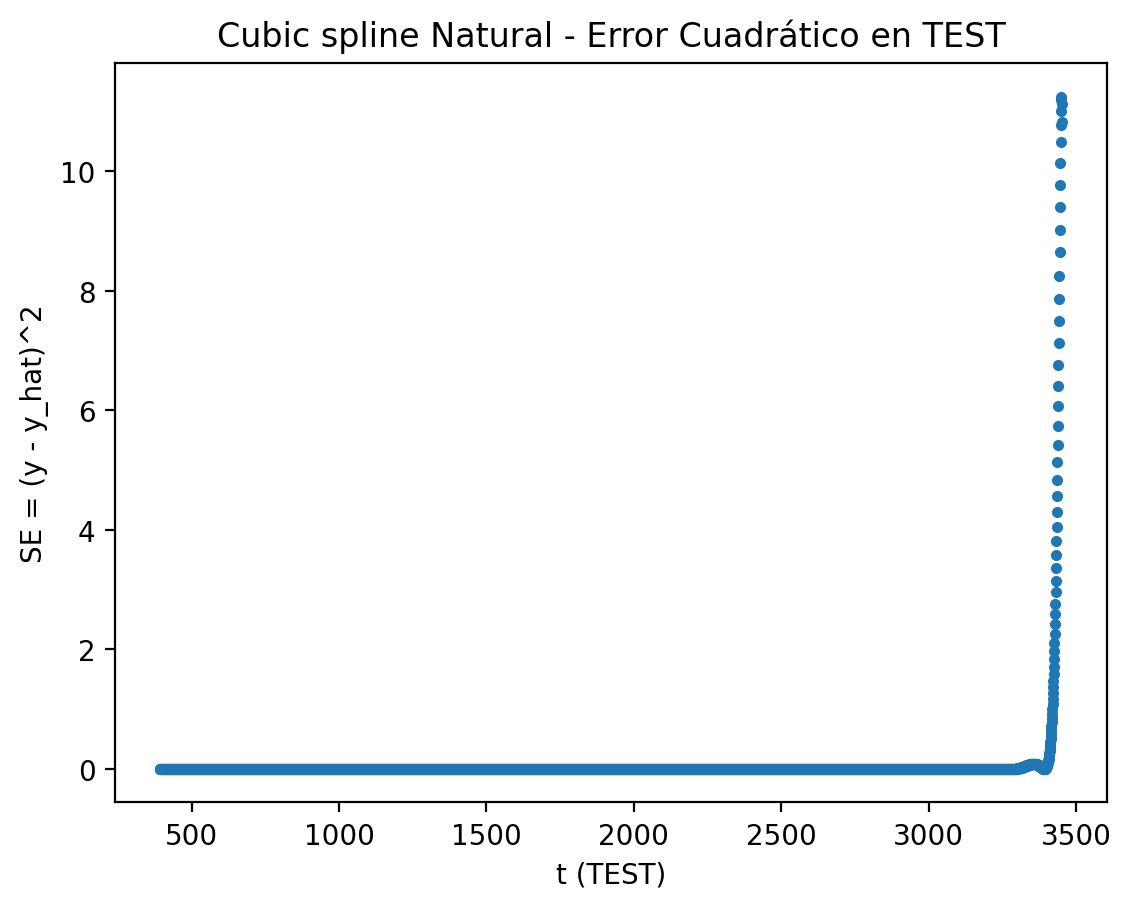

In [ ]:
#Errores para Cubic Spline Natural

# ===== 1) Predicciones en el conjunto de prueba =====
y_hat_cubic= train_cubicspline_n(t_test2)

# ===== 2) Errores punto a punto =====
ae_cubic = np.abs(y_hat_cubic - w_test2)  # Absolute Error (AE)
se_cubic = (y_hat_cubic - w_test2)**2     # Squared Error (SE)

# ===== 3) Métricas globales =====
MAE_cubic = float(np.mean(ae_cubic))
MSE_cubic = float(np.mean(se_cubic))

print(f"Cubic spline → MAE={MAE_cubic:.6e} | MSE={MSE_cubic:.6e}")

# ===== 4) Gráficas de los errores =====
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t_test2, ae_cubic, "o", ms=3)
plt.xlabel("t (TEST)")
plt.ylabel("AE = |y - y_hat|")
plt.title("Cubic spline Natural- Error Absoluto en TEST")
plt.show()

plt.figure()
plt.plot(t_test2, se_cubic, "o", ms=3)
plt.xlabel("t (TEST)")
plt.ylabel("SE = (y - y_hat)^2")
plt.title("Cubic spline Natural - Error Cuadrático en TEST")
plt.show()


Cubic spline → MAE=2.886335e-02 | MSE=4.322100e-02


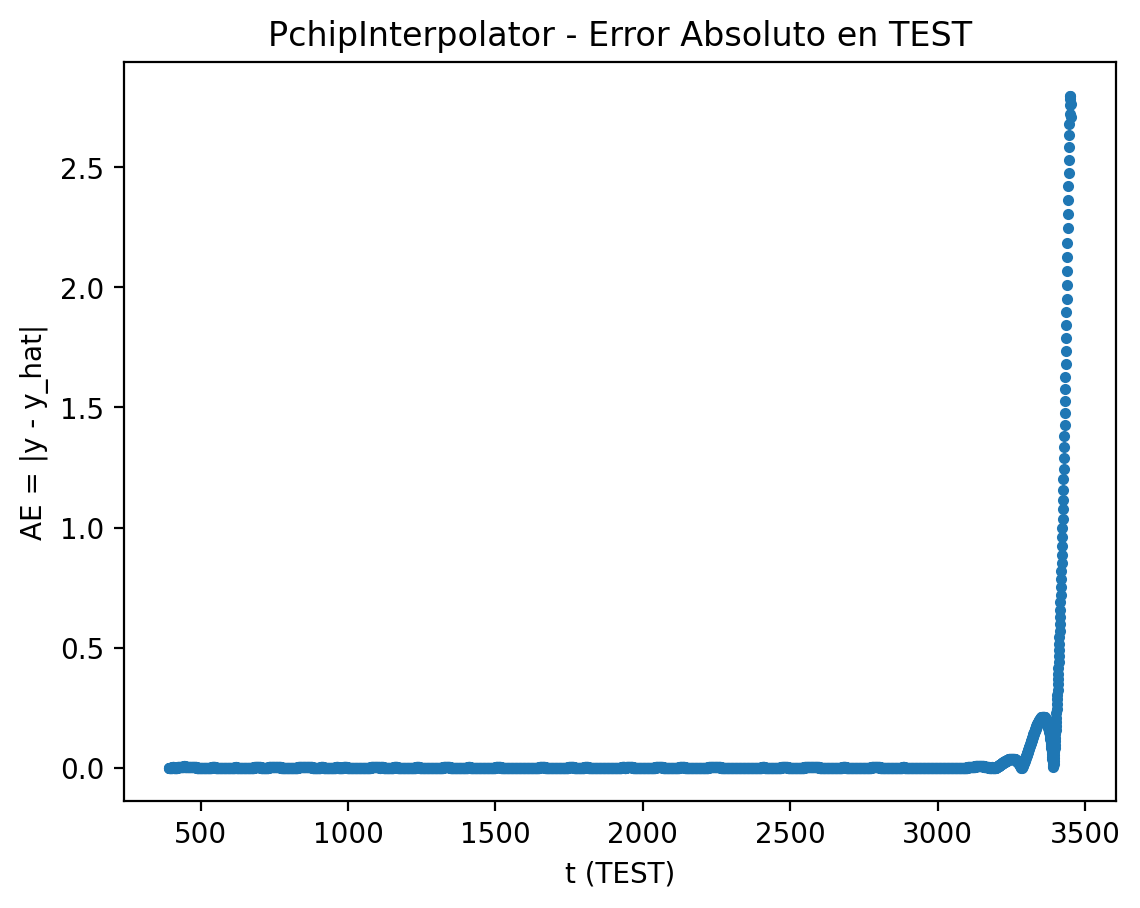

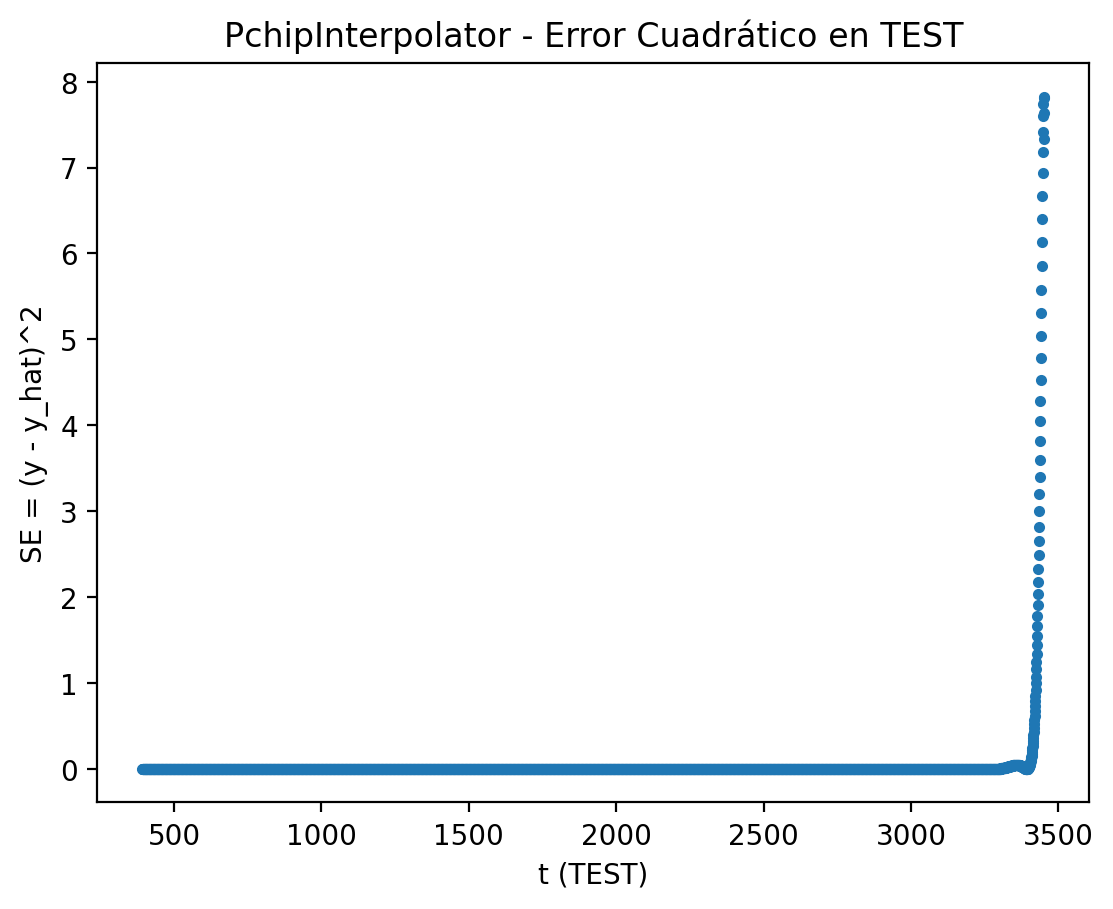

In [ ]:
#Errores para PchipInterpolator

# ===== 1) Predicciones en el conjunto de prueba =====
y_hat_interp= train_pchip(t_test2)

# ===== 2) Errores punto a punto =====
ae_interp = np.abs(y_hat_interp - w_test2)  # Absolute Error (AE)
se_interp = (y_hat_interp - w_test2)**2     # Squared Error (SE)

# ===== 3) Métricas globales =====
MAE_interp = float(np.mean(ae_interp))
MSE_interp = float(np.mean(se_interp))

print(f"Cubic spline → MAE={MAE_interp:.6e} | MSE={MSE_interp:.6e}")

# ===== 4) Gráficas de los errores =====
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t_test2, ae_interp, "o", ms=3)
plt.xlabel("t (TEST)")
plt.ylabel("AE = |y - y_hat|")
plt.title("PchipInterpolator - Error Absoluto en TEST")
plt.show()

plt.figure()
plt.plot(t_test2, se_interp, "o", ms=3)
plt.xlabel("t (TEST)")
plt.ylabel("SE = (y - y_hat)^2")
plt.title("PchipInterpolator - Error Cuadrático en TEST")
plt.show()


Ahora se calcula la derivada para el método Pchip y CubicSpline, usando la función que ya traen cargada cada uno respectivamente.
Se debe hacer uso de un concepto llamado "ISCO" que abrevia a "Innermost Stable Circular Orbit" o en español se refiere a la orbita más pequeña que puede tener un cuerpo que está orbitando a un objeto masivo sin resultar estrellándose en este debido al efecto de fuerzas gravitacionales.

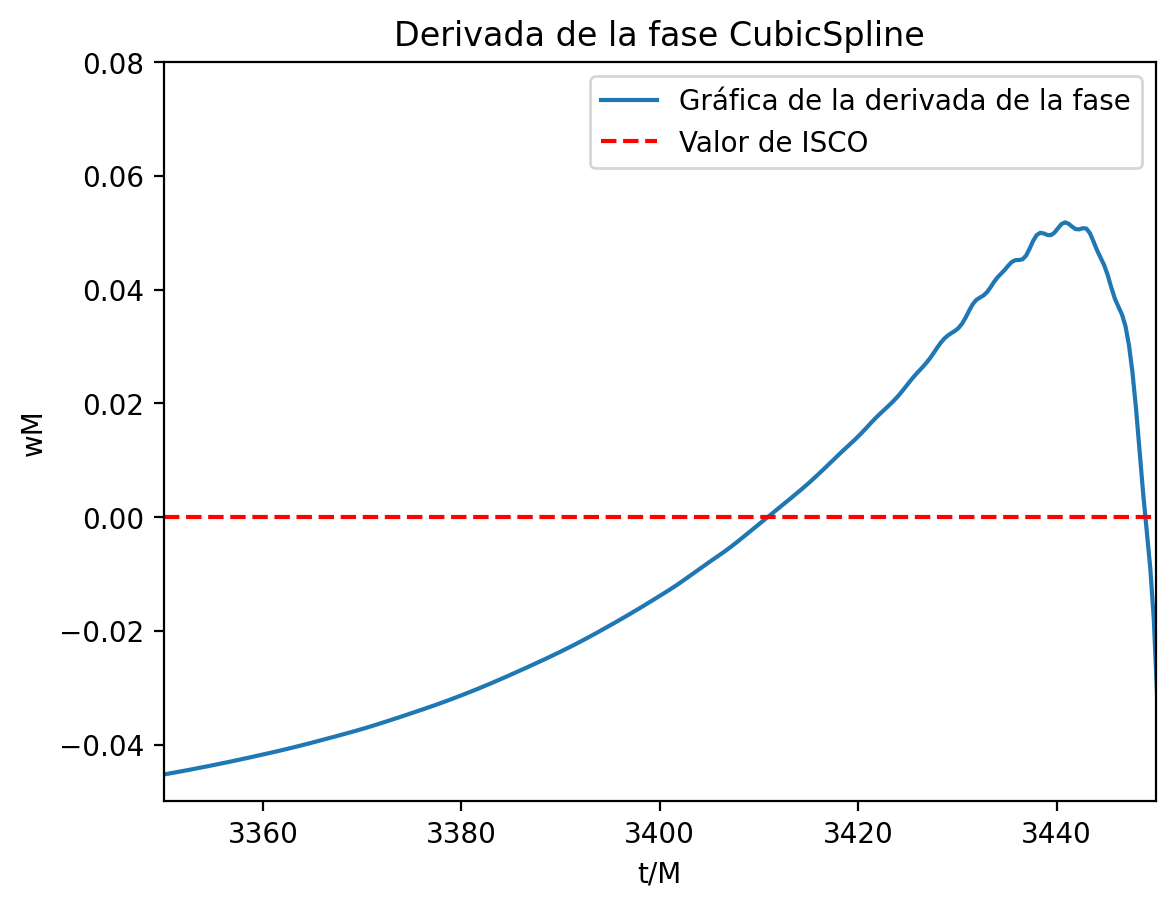

In [ ]:
#@title Derivada usando CubicSpline y definiciones importantes

w_c = CubicSpline(t_interp, -w_interp) #valores de la interpolación sobre los datos de la simulación
isco = 2*6**-1.5 #Valor de ISCO a trabajar
dif_w_c = w_c.derivative(1)(t_interp) #valores de la derivada en cada punto de tiempo en la simulación, esta derivada representa la frecuencia angular

def dif_ic(x):
  return w_c.derivative(1)(x) - isco
#Se hace una función que contenga la diferencia del valor de la función en un punto con el valor de ISCO, así al graficar y usar lo métodos para encontrar raíces de funciones
# se hace más sencillo el proceso ya que se encuentra la raíz de la función dif_i que para esa función su raíz sería cuando es igual a ISCO por lo que el proceso se entiende mejor.
plt.title('Derivada de la fase CubicSpline')
plt.plot(t_interp, dif_ic(t_interp), label = 'Gráfica de la derivada de la fase')
plt.axhline(y = 0, color='r', linestyle='--', label = 'Valor de ISCO')
plt.ylabel('wM')
plt.xlabel('t/M')
plt.xlim(3350, 3450)
plt.ylim(-0.050, 0.080)
plt.legend()
plt.show()
#En la gráfica se tiene la función recién definida y el valor de ISCO, así se entiende mejor lo que se busca hacer con los métodos para encontrar raíces
#encontrar el punto en que la frecuencia angular sea igual al valor de ISCO, eso significa que los valores en la gráfica antes de llegar a la línea roja,
#son las orbitas estables pero después de que la gráfica pasa ese punto, las orbitas se vuelven inestables.

In [ ]:
1#@title Definición de las funciones para el método de Bisección y Newton_Raphson

#La siguiente función establece cómo funciona el método de bisección que se basa en el teorema del valor medio
#busca un punto donde la función cambie de signo al buscar la condición f(a)*f(b) < 0, esta condición garantiza que dentro del intervalo [a,b]
#la funció cambia de signo en algún punto, o dicho de otra forma, hay un punto c tal que cumple f(c) = 0
#lo anterior es lo que se busca hacer con la función dif_i ya que el punto donde se hace cero es exactamente el punto donde es igual a ISCO.
def biseccion(f, x0, x1, kmax=200, tol=1.e-13):
    f0 = f(0)
    for k in range(1,kmax):
        x2 = (x0 + x1) / 2 #valor medio del intervalo inicial
        f2 = f(x2)
        if np.abs(f2) < tol:
          x2new = x2
          break
        if f0 * f2 < 0:
            x1 = x2 #si no se cumple lo anterior, se recorta el intervalo hasta encontrar el cero
        else:
            x0, f0 = x2, f2
        x2new = (x0 + x1) / 2
        xdiff = abs(x2new - x2)
        if abs(xdiff / x2new) < tol:
            break
        else:
            x2new = None
    print(f"El número de iteraciones para el método de bisección fue de {k}")
    print(f"El valor de tiempo en que la función se vuelve cero es en {x2new}")
    return x2new
#La siguiente función representa al método de Newton-Raphson que se basa en la tangente de la curva para aproximar raíces
#para que este método funcione necesita que la derivada en la raíz no sea cero y que el punto inicial x0 esté cerca a la raíz
#ya que este calcula el siguiente punto haciendo la diferencia entre el punto en el que se encuentra con la función en ese punto, toda esa diferencia sobre la derivada en ese punto
#y se encarga de aproximar estos valores hasta llegar a la raíz, por lo mismo, necesita no solo que la función sea continua sino que sea diferenciable .
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:
            return x, i+1
        dfx = df(x)
        if abs(dfx) < 1e-12:
            print ("Derivada pequeña") #hay problemas ya que si la derivada es muy pequeña, no se puede dividir entre ella; pierde efectividad el método
        x = x - fx / dfx
    print("Número de iteraciones máximas alcanzado")





El número de iteraciones para el método de bisección fue de 36
El valor de tiempo en que la función se vuelve cero es en 3410.87937023578
3410.87937023578
El valor de frecuencia angular donde es igual a isco que encontró el método de bisección es 0.1360827634882206 con un error aproximado respecto al valor real de ISCO de 0.9999999999980435


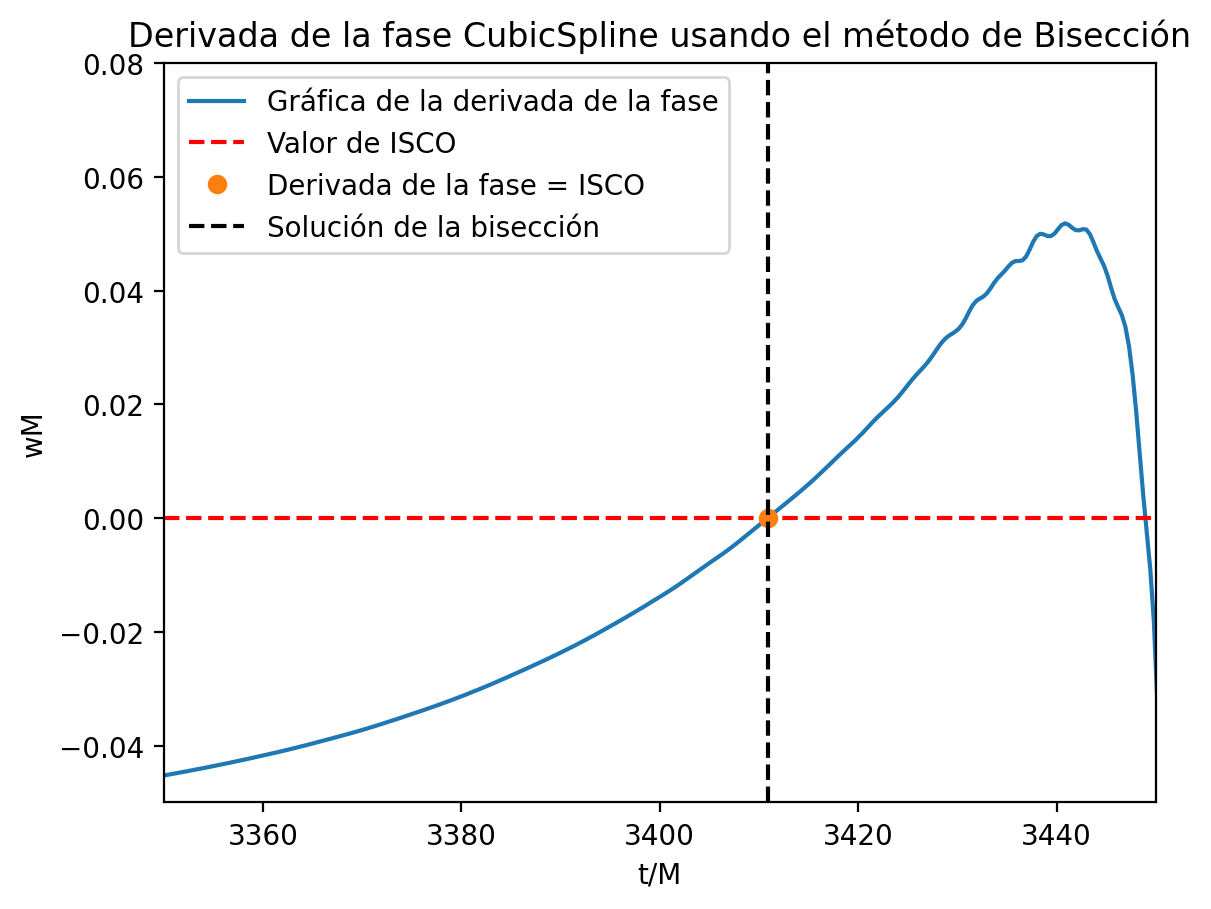

In [ ]:
#@title Método de Bisección para la derivada CubicSpline

sol_bic=biseccion(dif_ic,3380,3420) #se da un rango aproximado de donde se encuentra el cero para optimizar el proceso y se asegura la existencia de la raíz ya que la función cambia de signo.
print(sol_bic)
print(f'El valor de frecuencia angular donde es igual a isco que encontró el método de bisección es {dif_ic(sol_bic) + isco} con un error aproximado respecto al valor real de ISCO de {np.abs(isco-dif_ic(sol_bic))/isco}')

plt.title('Derivada de la fase CubicSpline usando el método de Bisección')
plt.plot(t_interp, dif_w_c - isco, label = 'Gráfica de la derivada de la fase')
plt.axhline(y = 0, color='r', linestyle='--', label = 'Valor de ISCO')
plt.plot(sol_bic, 0, 'o', label = 'Derivada de la fase = ISCO')
plt.xlim(3350, 3450)
plt.ylim(-0.050, 0.080)
plt.ylabel('wM')
plt.xlabel('t/M')
plt.axvline(x=sol_bic, color='k', linestyle = '--', label = 'Solución de la bisección')
plt.legend()
plt.show()


El valor de tiempo en el que la función se vuelve cero es en 3410.879370348156
El valor de frecuencia angular que encontró el método de Newton-Raphson  en donde es igual a ISCO es 0.13608276364674135 con un error aproximado respecto al valor real de ISCO de 0.9999999988331585
Número de iteraciones en el método de Newton-Raphson fue de 4


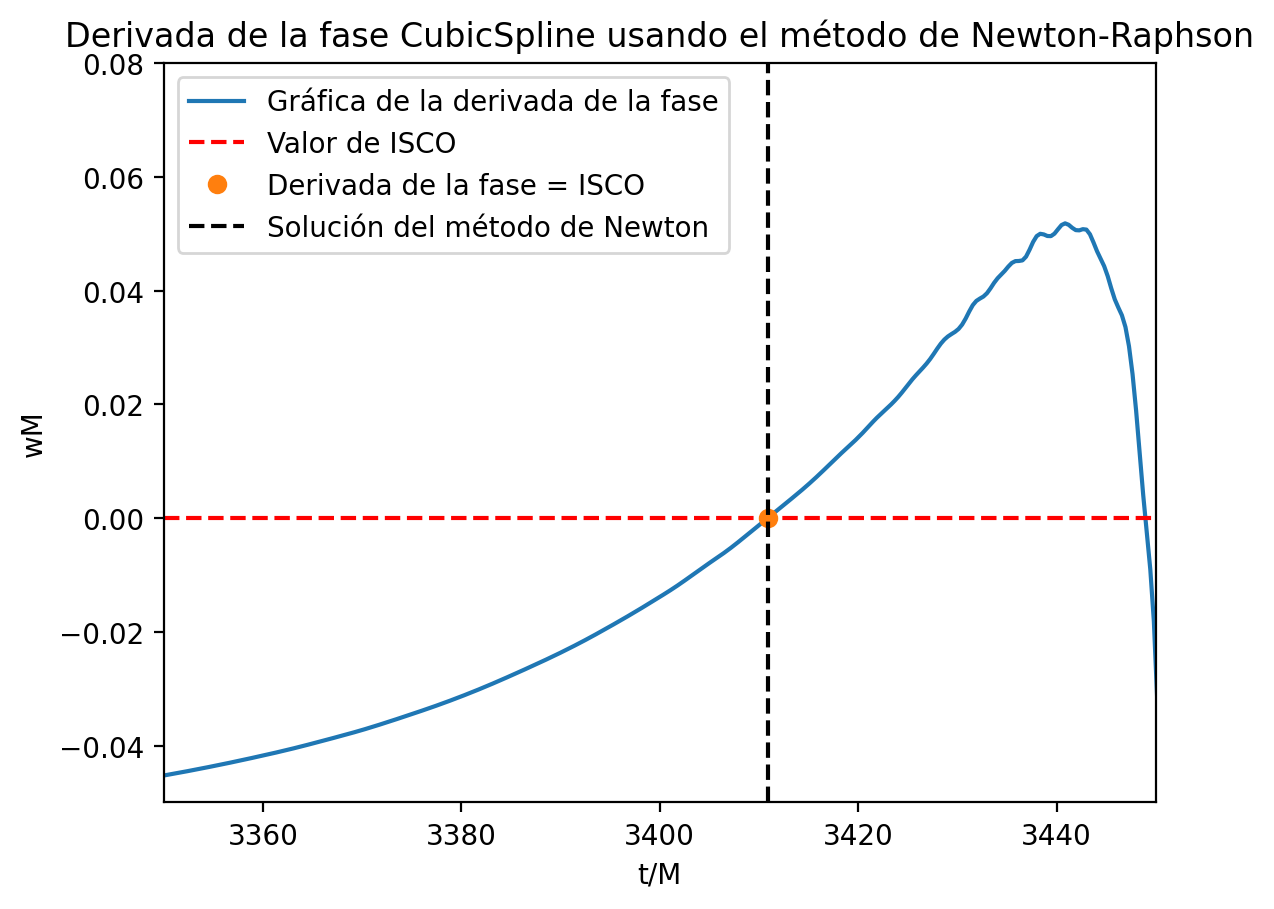

In [ ]:
#@title Método de Newton-Raphson para derivada CubicSpline
#Se define la segunda derivada de la fase ya que se está trabajando con la derivada entonces el método de Newton-Raphson necesita de esa función.
def dif_ic2(x):
  return w_c.derivative(2)(x)

sol_newc, iteraciones_c = newton_raphson(dif_ic, dif_ic2, 3400)
print(f'El valor de tiempo en el que la función se vuelve cero es en {sol_newc}')
print(f'El valor de frecuencia angular que encontró el método de Newton-Raphson  en donde es igual a ISCO es {dif_ic(sol_newc)+isco} con un error aproximado respecto al valor real de ISCO de {np.abs(isco-dif_ic(sol_newc))/isco}')
print(f"Número de iteraciones en el método de Newton-Raphson fue de {iteraciones_c}")

plt.title('Derivada de la fase CubicSpline usando el método de Newton-Raphson')
plt.plot(t_interp, dif_ic(t_interp), label ='Gráfica de la derivada de la fase')
plt.axhline(y = 0, color='r', linestyle='--', label = 'Valor de ISCO')
plt.plot(sol_newc, 0, 'o', label = 'Derivada de la fase = ISCO' )
plt.axvline(x = sol_newc, color='k', linestyle='--', label = 'Solución del método de Newton')
plt.ylim(-0.050, 0.080)
plt.xlim(3350, 3450)
plt.ylabel('wM')
plt.xlabel('t/M')
plt.legend()
plt.show()

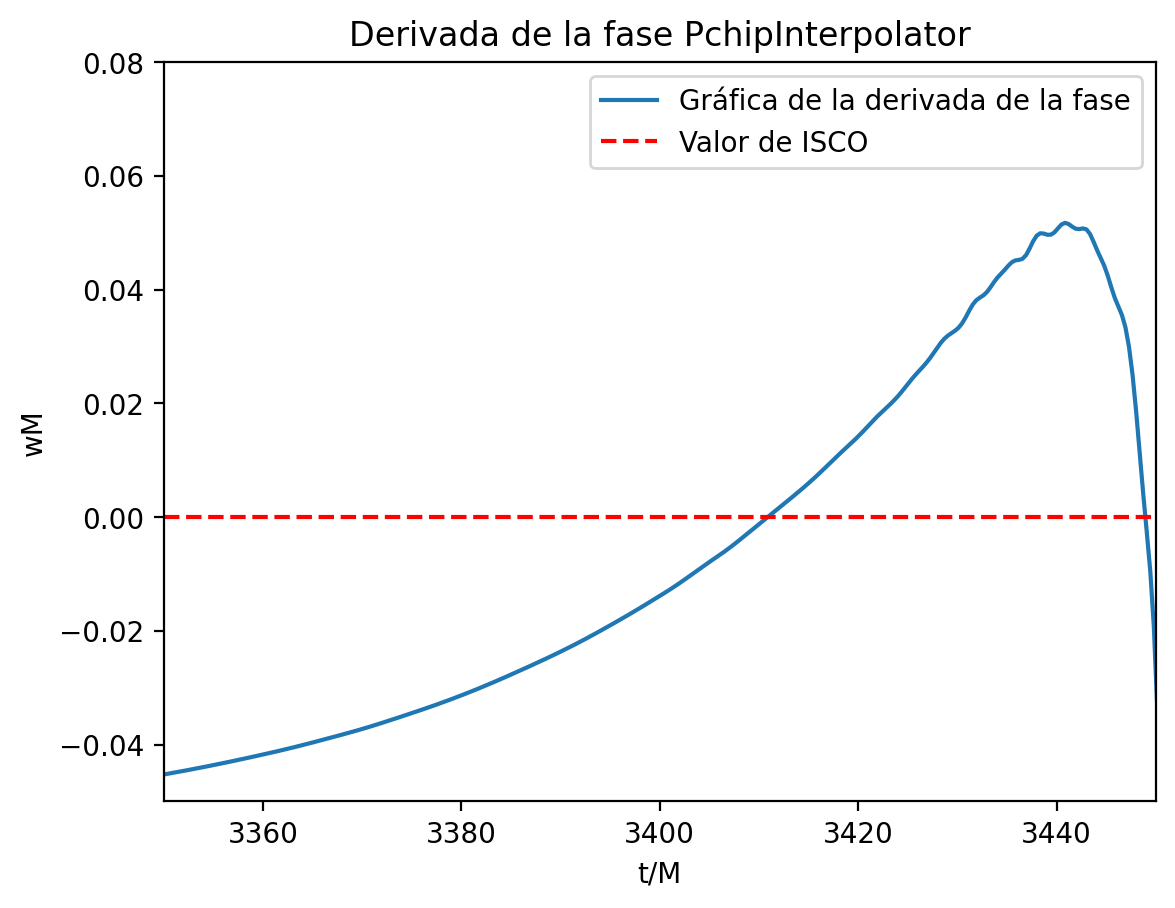

In [ ]:
#@title Derivada Pchip

w_p = PchipInterpolator(t_interp, -w_interp) #valores de la interpolación sobre los datos de la simulación
dif_w_p = w_p.derivative(1)(t_interp)

def dif_ip(x):
  return w_p.derivative(1)(x) - isco

def dif_ip2(x):
  return w_p.derivative(2)(x) #aquí no aparece isco porque al ser una constante, al derivar dif_ip se hace cero

plt.title('Derivada de la fase PchipInterpolator')
plt.plot(t_interp, dif_ip(t_interp), label = 'Gráfica de la derivada de la fase')
plt.axhline(y = 0, color='r', linestyle='--', label = 'Valor de ISCO')
plt.ylabel('wM')
plt.xlabel('t/M')
plt.xlim(3350, 3450)
plt.ylim(-0.050, 0.080)
plt.legend()
plt.show()
#Se grafica la frecuencia angular resultante de la derivada de la fase usando la función de Pchip

El número de iteraciones para el método de bisección fue de 36
El valor de tiempo en que la función se vuelve cero es en 3410.8793737125234
El valor de la derivada en el que es igual a ISCO en el método de bisección es 0.13608276348807444, este valor tiene un error comparado a ISCO de 0.9999999999991175


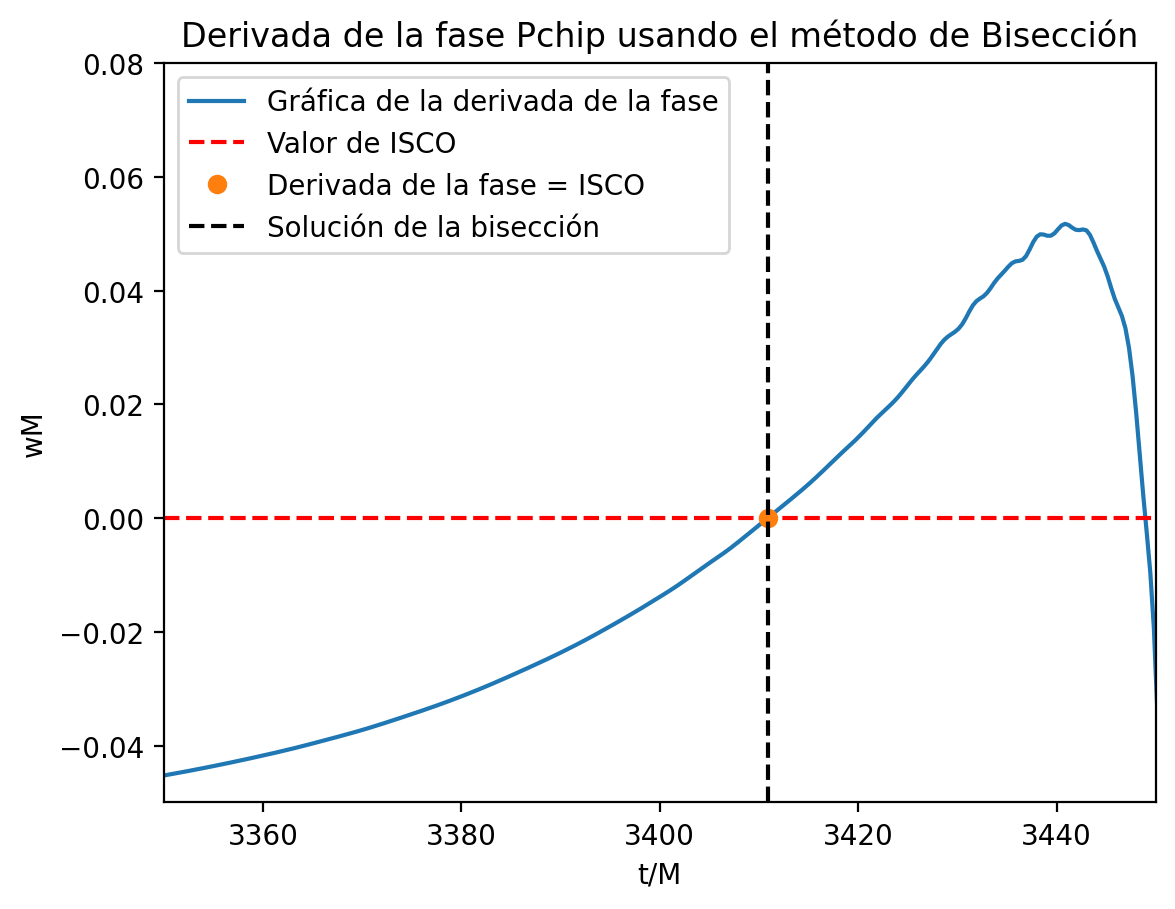

In [ ]:
#@title Método de Bisección para la derivada Pchip

sol_bip = biseccion(dif_ip, 3380, 3420) #se pone la función a encontrar su raíz y un rango aproximado en donde se encuentra la raíz.
print(f'El valor de la derivada en el que es igual a ISCO en el método de bisección es {dif_ip(sol_bip)+isco}, este valor tiene un error comparado a ISCO de {np.abs(isco-dif_ip(sol_bip))/isco}')

plt.title('Derivada de la fase Pchip usando el método de Bisección')
plt.plot(t_interp, dif_ip(t_interp), label = 'Gráfica de la derivada de la fase')
plt.axhline(y = 0, color='r', linestyle='--', label = 'Valor de ISCO')
plt.plot(sol_bip, 0, 'o', label = 'Derivada de la fase = ISCO')
plt.axvline(x=sol_bip, color='k', linestyle = '--', label = 'Solución de la bisección')
plt.xlim(3350, 3450)
plt.ylim(-0.050, 0.080)
plt.ylabel('wM')
plt.xlabel('t/M')
plt.legend()
plt.show()

El valor de tiempo en el que la función se vuelve cero es en 3410.8793732332365
El valor de la derivada en donde se hace cero es 0.13608276281032183 con un error aproximado respecto al valor real de ISCO de 1.0000000049795617
Número de iteraciones para el método Newton-Raphson es de 4


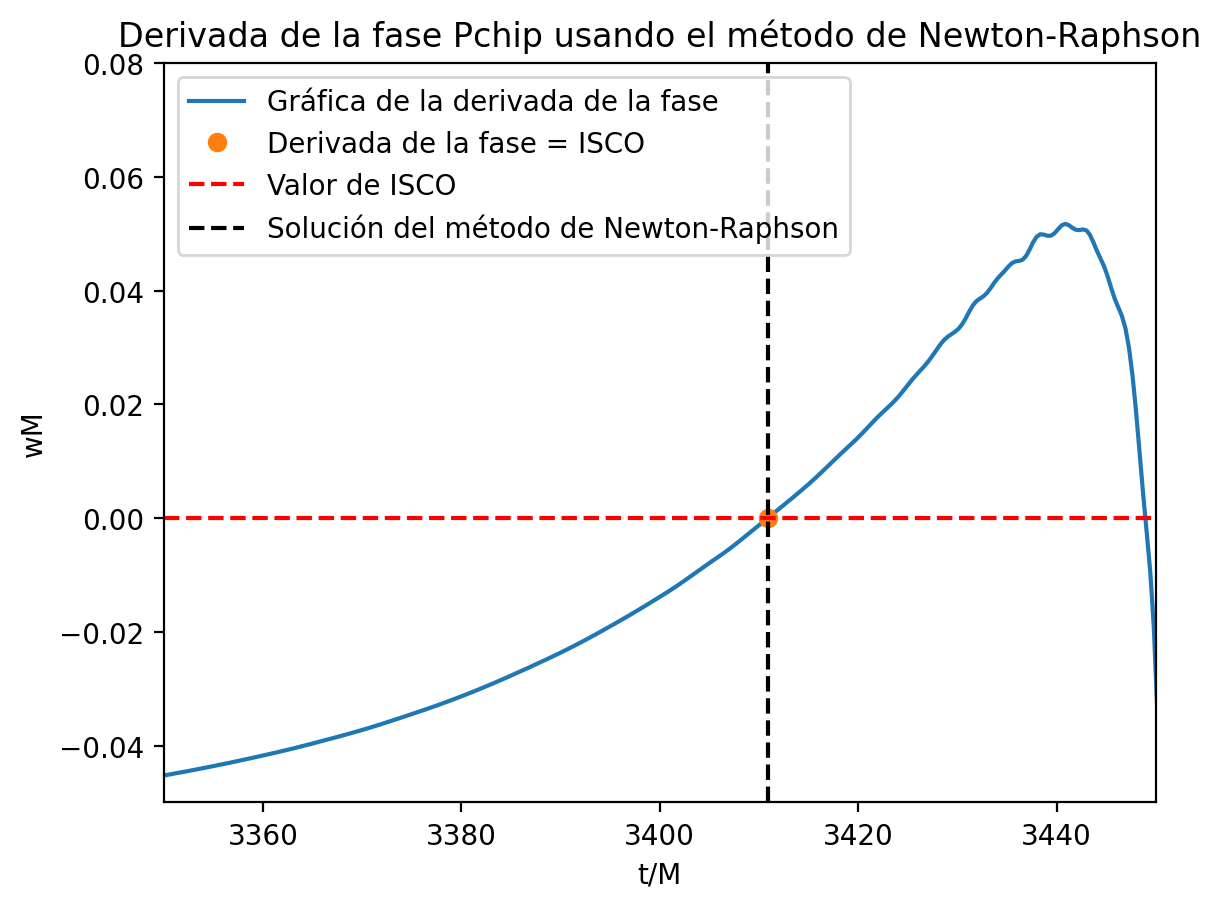

In [ ]:
#@title Método de Newton-Raphson para la derivada Pchip

sol_newp, iteraciones_p = newton_raphson(dif_ip, dif_ip2, 3400)
print(f'El valor de tiempo en el que la función se vuelve cero es en {sol_newp}')
print(f'El valor de la derivada en donde se hace cero es {dif_ip(sol_newp)+isco} con un error aproximado respecto al valor real de ISCO de {np.abs(isco-dif_ip(sol_newp))/isco}')
print(f"Número de iteraciones para el método Newton-Raphson es de {iteraciones_p}")

plt.title('Derivada de la fase Pchip usando el método de Newton-Raphson')
plt.plot(t_interp, dif_ip(t_interp), label = 'Gráfica de la derivada de la fase')
plt.plot(sol_newp, 0, 'o', label = 'Derivada de la fase = ISCO')
plt.axhline(y = 0, color='r', linestyle='--', label = 'Valor de ISCO')
plt.axvline(x = sol_newp, color='k', linestyle='--', label = 'Solución del método de Newton-Raphson')
plt.xlim(3350, 3450)
plt.ylim(-0.050, 0.080)
plt.ylabel('wM')
plt.xlabel('t/M')
plt.legend()
plt.show()


# Derivada usando Diferencias Finitas

Paso promedio: 28.57407898390911
Desviación estándar: 0.014948258443099448
Variación relativa del paso: 0.05231%


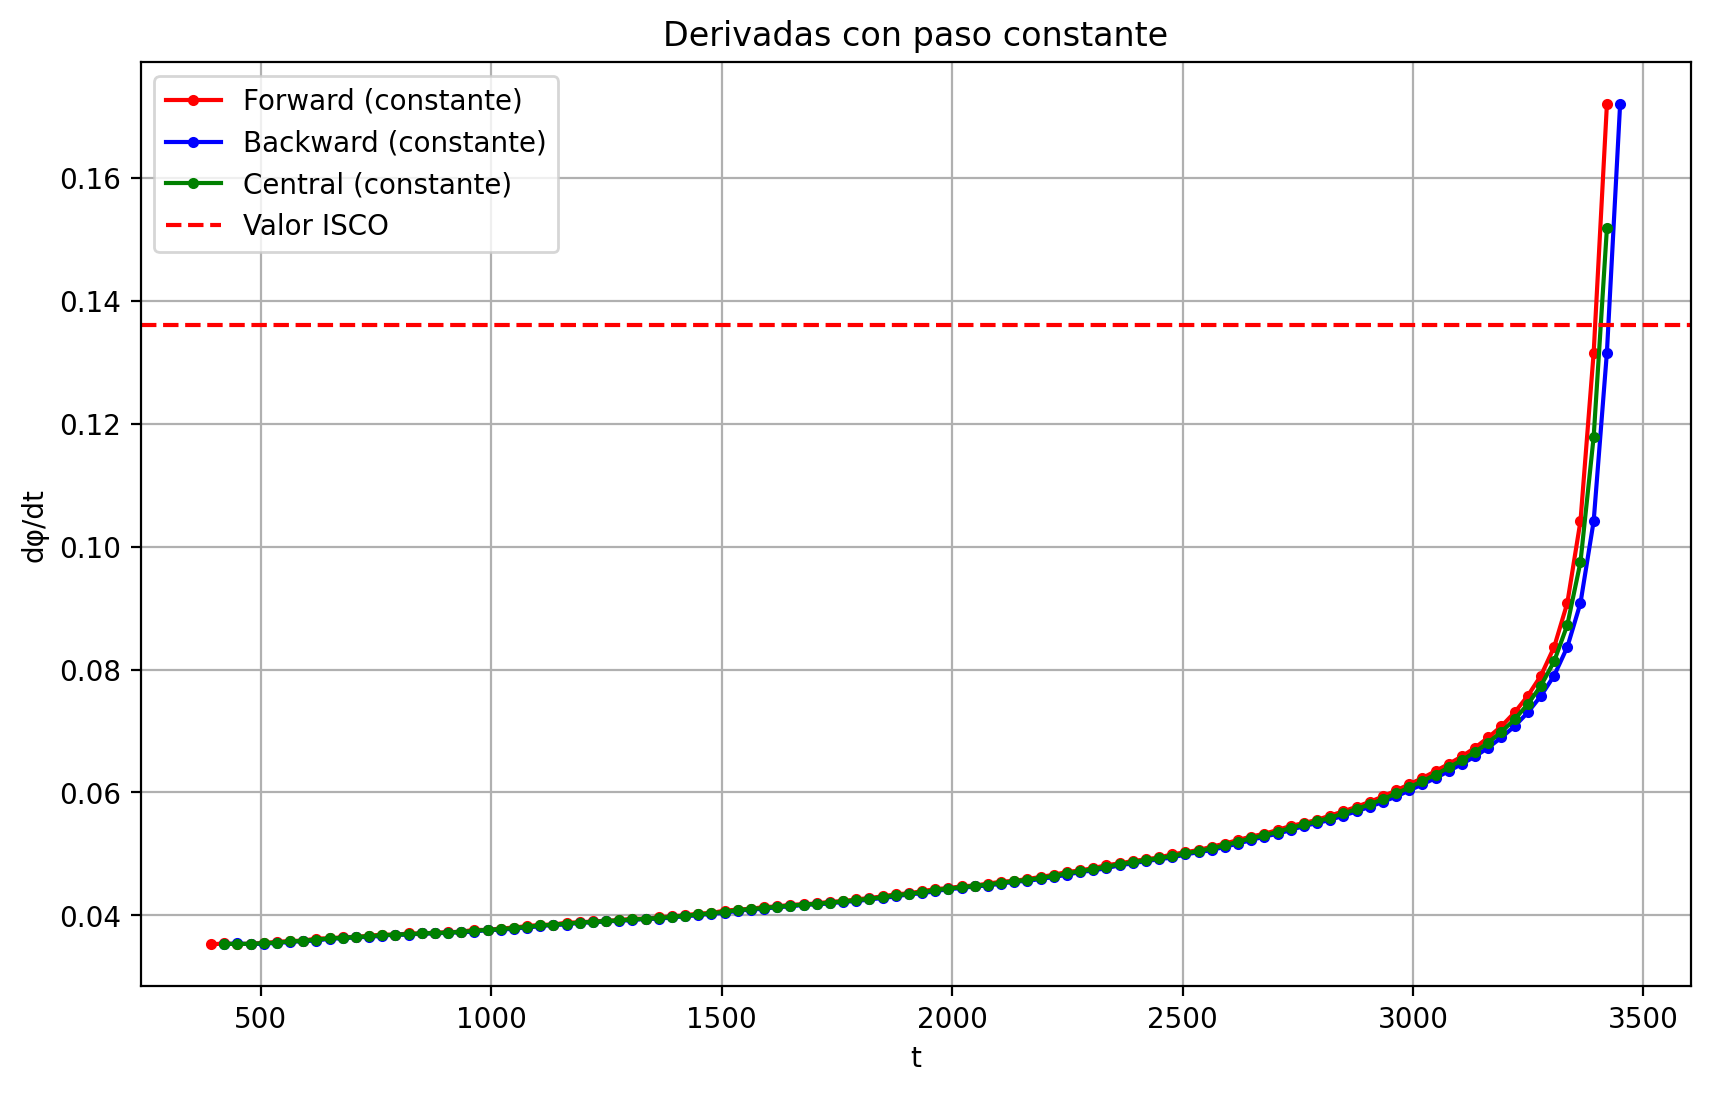

In [ ]:
#Se seleccionan datos de los originales con un salto entre ellos de 80 para poder tomar mayor cantidad de datos dentro de los valores originales.
#Se hace para obtener mayor información sobre la fase en menos puntos
t_disc = t_interp[::80]
phi_disc = -w_interp[::80]

# Diferencias entre tiempos consecutivos
pasos = np.diff(t_disc)

#Cálculos para verificar la uniformidad del paso
print("Paso promedio:", np.mean(pasos))
print("Desviación estándar:", np.std(pasos))
uniformidad = (np.std(pasos) / np.mean(pasos)) * 100
print(f"Variación relativa del paso: {uniformidad:.5f}%")

# Si la variación es muy pequeña, el paso de malla se considera uniforme.
h = t_disc[1] - t_disc[0]  # paso uniforme


# Diferencias finitas con paso constante


# Diferencia Paso adelante
phi_forward = (phi_disc[1:] - phi_disc[:-1]) / h
t_forward = t_disc[:-1]

# Diferencia Paso atrás
phi_backward = (phi_disc[1:] - phi_disc[:-1]) / h
t_backward = t_disc[1:]

# Diferencia centrada
phi_central = (phi_disc[2:] - phi_disc[:-2]) / (2*h)
t_central = t_disc[1:-1]


# Gráficas de las derivadas

plt.figure(figsize=(10,6))
plt.plot(t_forward,  phi_forward,  "r.-", label="Forward (constante)")
plt.plot(t_backward, phi_backward, "b.-", label="Backward (constante)")
plt.plot(t_central,  phi_central,  "g.-", label="Central (constante)")
plt.axhline(y=isco, color='r', linestyle='--', label='Valor ISCO')
plt.xlabel("t")
plt.ylabel("dφ/dt")
plt.title("Derivadas con paso constante")
plt.legend()
plt.grid(True)
plt.show()


 COMPARACIÓN DE ERRORES RMSE EN CADA PASO (ANTES Y DESPUÉS DE INTERPOLAR)

===== Salto = 140 | h = 4.99984e+01 =====
Forward:  Directo = 4.71813e-03 | Interpolado = 7.37019e-03 | Δ = 56.21%
Backward: Directo = 5.28372e-03 | Interpolado = 5.15780e-03 | Δ = -2.38%
Central:  Directo = 1.30196e-03 | Interpolado = 3.41874e-03 | Δ = 162.58%

===== Salto = 70 | h = 2.49992e+01 =====
Forward:  Directo = 2.66786e-03 | Interpolado = 6.37072e-03 | Δ = 138.80%
Backward: Directo = 2.42217e-03 | Interpolado = 4.53379e-03 | Δ = 87.18%
Central:  Directo = 4.37419e-04 | Interpolado = 4.05676e-03 | Δ = 827.43%

===== Salto = 35 | h = 1.24996e+01 =====
Forward:  Directo = 1.39355e-03 | Interpolado = 5.12708e-03 | Δ = 267.91%
Backward: Directo = 1.18611e-03 | Interpolado = 4.45724e-03 | Δ = 275.78%
Central:  Directo = 1.59418e-04 | Interpolado = 4.33343e-03 | Δ = 2618.29%


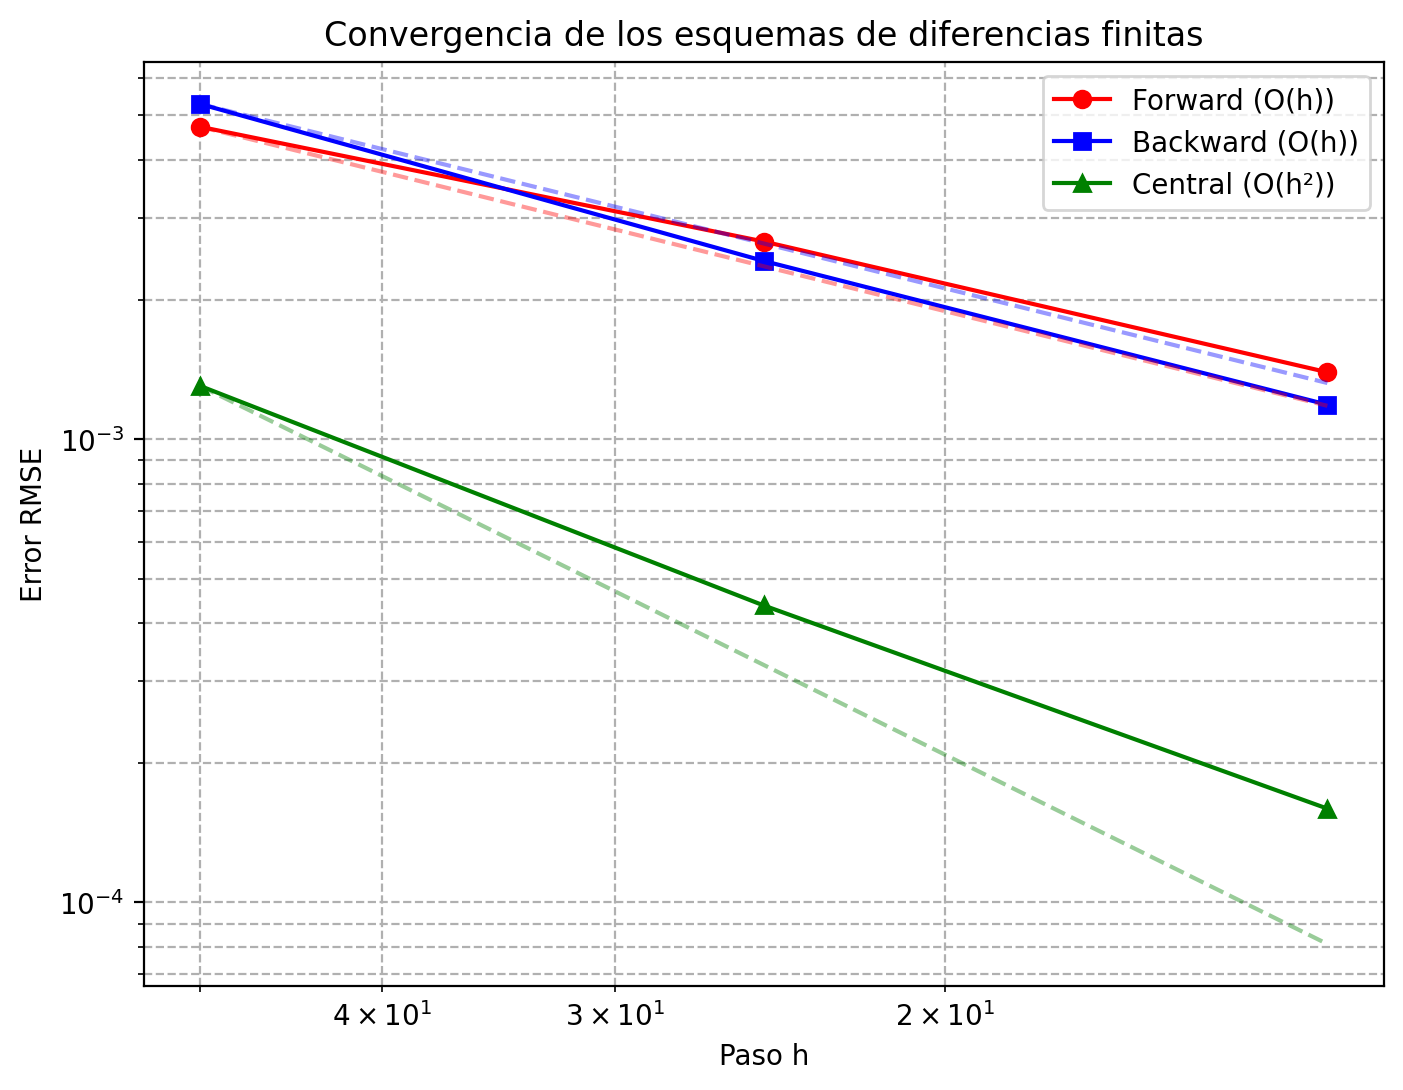

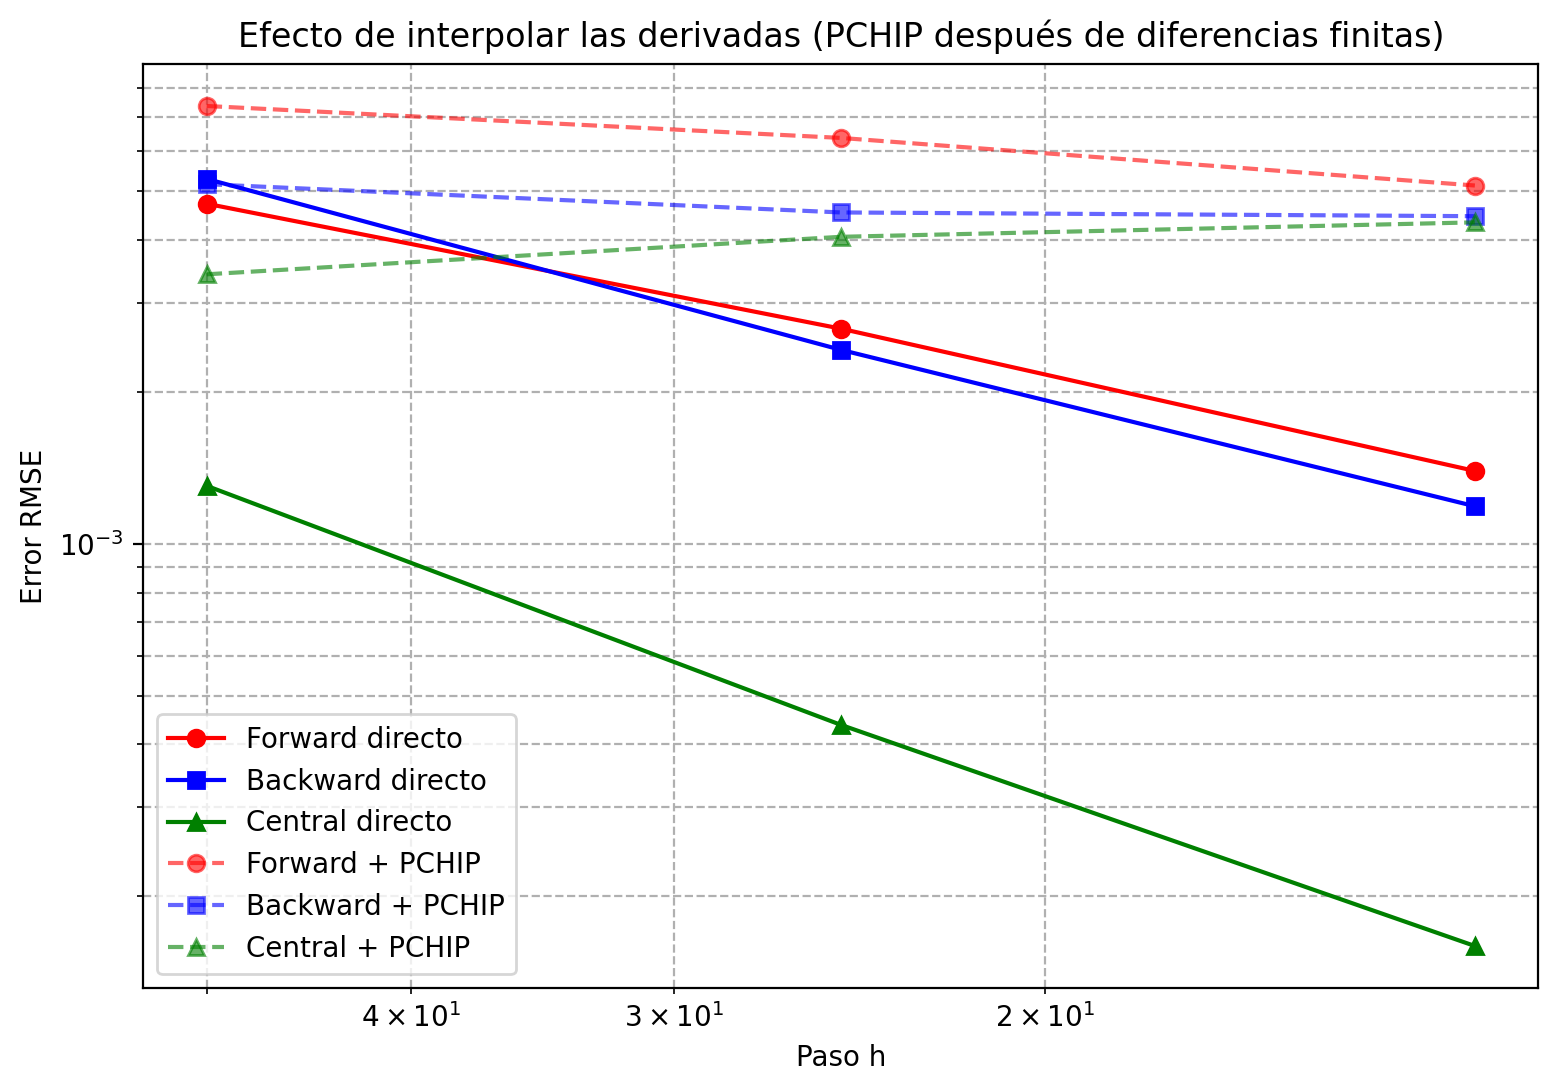

In [ ]:
from scipy.interpolate import PchipInterpolator

# # PRUEBA DE CONVERGENCIA DE LAS DIFERENCIAS FINITAS Y EFECTO DE INTERPOLAR DESPUÉS DE DERIVAR (PCHIP)

saltos = [140, 70, 35]  # h, h/2, h/4
h_values = []
err_direct = {'forward': [], 'backward': [], 'central': []}
err_interp = {'forward': [], 'backward': [], 'central': []}

print("\n==============================================================")
print(" COMPARACIÓN DE ERRORES RMSE EN CADA PASO (ANTES Y DESPUÉS DE INTERPOLAR)")
print("==============================================================")

for salto in saltos:

    # 1. Submuestreo

    t_disc = t_interp[::salto]
    phi_disc = -w_interp[::salto]
    h = t_disc[1] - t_disc[0]
    h_values.append(h)

    # 2. Derivadas por diferencias finitas

    phi_forward = (phi_disc[1:] - phi_disc[:-1]) / h
    phi_backward = (phi_disc[1:] - phi_disc[:-1]) / h
    phi_central = (phi_disc[2:] - phi_disc[:-2]) / (2*h)

    t_forward = t_disc[:-1]
    t_backward = t_disc[1:]
    t_central = t_disc[1:-1]

    # 3. Derivada de referencia

    phi_ref_f = dif_ip(t_forward) + isco
    phi_ref_b = dif_ip(t_backward) + isco
    phi_ref_c = dif_ip(t_central) + isco

    # 4. Error directo (sin interpolación)

    rmse_f = np.sqrt(np.mean((phi_forward - phi_ref_f)**2))
    rmse_b = np.sqrt(np.mean((phi_backward - phi_ref_b)**2))
    rmse_c = np.sqrt(np.mean((phi_central - phi_ref_c)**2))
    err_direct['forward'].append(rmse_f)
    err_direct['backward'].append(rmse_b)
    err_direct['central'].append(rmse_c)

    # 5. Interpolación PCHIP de las derivadas

    f_f = PchipInterpolator(t_forward, phi_forward)
    f_b = PchipInterpolator(t_backward, phi_backward)
    f_c = PchipInterpolator(t_central, phi_central)

    # Evaluamos las derivadas interpoladas en la malla original
    phi_f_int = f_f(t_interp[:-1])
    phi_b_int = f_b(t_interp[1:])
    phi_c_int = f_c(t_interp[1:-1])

    # Derivada de referencia en los mismos puntos
    phi_ref_f_int = dif_ip(t_interp[:-1]) + isco
    phi_ref_b_int = dif_ip(t_interp[1:]) + isco
    phi_ref_c_int = dif_ip(t_interp[1:-1]) + isco

    # 6. Error después de interpolar

    rmse_f_int = np.sqrt(np.mean((phi_f_int - phi_ref_f_int)**2))
    rmse_b_int = np.sqrt(np.mean((phi_b_int - phi_ref_b_int)**2))
    rmse_c_int = np.sqrt(np.mean((phi_c_int - phi_ref_c_int)**2))
    err_interp['forward'].append(rmse_f_int)
    err_interp['backward'].append(rmse_b_int)
    err_interp['central'].append(rmse_c_int)

    # 7. Incremento porcentual del error

    inc_f = (rmse_f_int - rmse_f) / rmse_f * 100
    inc_b = (rmse_b_int - rmse_b) / rmse_b * 100
    inc_c = (rmse_c_int - rmse_c) / rmse_c * 100

    print(f"\n===== Salto = {salto} | h = {h:.5e} =====")
    print(f"Forward:  Directo = {rmse_f:.5e} | Interpolado = {rmse_f_int:.5e} | Δ = {inc_f:.2f}%")
    print(f"Backward: Directo = {rmse_b:.5e} | Interpolado = {rmse_b_int:.5e} | Δ = {inc_b:.2f}%")
    print(f"Central:  Directo = {rmse_c:.5e} | Interpolado = {rmse_c_int:.5e} | Δ = {inc_c:.2f}%")

# 8. Gráfica de convergencia teórica (con líneas de referencia)

plt.figure(figsize=(8,6))
plt.loglog(h_values, err_direct['forward'],  "r-o", label="Forward (O(h))")
plt.loglog(h_values, err_direct['backward'], "b-s", label="Backward (O(h))")
plt.loglog(h_values, err_direct['central'],  "g-^", label="Central (O(h²))")

# Líneas teóricas de referencia
plt.loglog(h_values, np.array(h_values)*err_direct['forward'][0]/h_values[0], 'r--', alpha=0.4)
plt.loglog(h_values, np.array(h_values)*err_direct['backward'][0]/h_values[0], 'b--', alpha=0.4)
plt.loglog(h_values, np.array(h_values)**2*err_direct['central'][0]/h_values[0]**2, 'g--', alpha=0.4)

plt.gca().invert_xaxis()
plt.xlabel("Paso h")
plt.ylabel("Error RMSE")
plt.title("Convergencia de los esquemas de diferencias finitas")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# 9. Gráfica comparativa (directo vs interpolado)

plt.figure(figsize=(9,6))
plt.loglog(h_values, err_direct['forward'],  "r-o", label="Forward directo")
plt.loglog(h_values, err_direct['backward'], "b-s", label="Backward directo")
plt.loglog(h_values, err_direct['central'],  "g-^", label="Central directo")

plt.loglog(h_values, err_interp['forward'],  "r--o", alpha=0.6, label="Forward + PCHIP")
plt.loglog(h_values, err_interp['backward'], "b--s", alpha=0.6, label="Backward + PCHIP")
plt.loglog(h_values, err_interp['central'],  "g--^", alpha=0.6, label="Central + PCHIP")

plt.gca().invert_xaxis()
plt.xlabel("Paso h")
plt.ylabel("Error RMSE")
plt.title("Efecto de interpolar las derivadas (PCHIP después de diferencias finitas)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


In [ ]:
from scipy.optimize import bisect, newton

In [ ]:
# descargar los datos
!wget 'https://drive.google.com/uc?export=download&id=1q7CnKdwsaemYC-eWZeDsKuaOaX82SLFu' -O NSNS_Opt.txt

--2025-10-16 18:29:39--  https://drive.google.com/uc?export=download&id=1q7CnKdwsaemYC-eWZeDsKuaOaX82SLFu
Resolving drive.google.com (drive.google.com)... 142.251.188.101, 142.251.188.139, 142.251.188.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.188.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1q7CnKdwsaemYC-eWZeDsKuaOaX82SLFu&export=download [following]
--2025-10-16 18:29:39--  https://drive.usercontent.google.com/download?id=1q7CnKdwsaemYC-eWZeDsKuaOaX82SLFu&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.202.132, 2607:f8b0:400e:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153000 (149K) [application/octet-stream]
Saving to: ‘NSNS_Opt.txt’

NSNS_Opt.txt        100%[===================>] 149.41K  --.-K

Power spectral density  $S_n(f)$ (PSD) y amplitude spectral density (ASD)
$$S_n(f) = ASD^2$$
La razon señal ruido esperada:



$$\langle\rho^2\rangle = \frac{4G F_+^2}{2 c^3\pi^2 d^2}\int_{20}^{f_{isco}} \frac{1}{f^2 S_n}\frac{dE}{df}df $$
o
$$\langle\rho^2\rangle = \int_{20}^{f_{isco}} \frac{H_{(f)}}{Sn_{(f)}} df ,  $$

donde:

$$ H_{(f)} =  -\frac{4G F_+^2}{2 c^3\pi^2 d^2 f^2} \frac{d E_{orb}}{df} ,$$

al dejar todo en términos de la frecuencia se llega a:


$$ H_{(f)} = - \frac{4G F_+^2}{2 c^3\pi^2 d^2} \frac{(- GM_1 M_2 \pi^{2/3})}{3(GM)^{1/3}}\frac{1}{f^{7/3}} ; $$

donde es $F_+^2 = 1/5$, $d$ es la distancia a la fuente, se tomara como 40 Mpc y $dE/df = -dE_{orb}/df$, $E_{orb}$ es la energia total en una orbita circular,
$$ E_{orb} = -\frac{1}{2}\frac{G m_1 m_2}{R}$$
Ley de Kepler,
$$ \frac{\omega}{2} = \Omega = \sqrt{\frac{G M}{R^3}}$$
Recordar $\Omega$ es la frecuencia angular orbital y $\omega$ es la frecuencia angular de la onda gravitational $\omega=2\pi f$

In [ ]:
#@title Definiciones importantes para el integrando

ligo_optimized_asd = np.genfromtxt('NSNS_Opt.txt') #Datos de la nueva simulación
c = 3*10**8
G = 6.67408*10**(-11)
masa1= 1.4*2*10**30
masa2 = masa1
mtotal = masa1 * 2
f_isco = (6**((-3/2))* c**3) / (np.pi * G * mtotal)


freqs_comp= ligo_optimized_asd[:,0] #frequencias con las que se va a trabajar

ind = np.where((freqs_comp >= 20) & (freqs_comp <= f_isco)) #se limita el rango a trabajar

freqs = freqs_comp[ind]

ASD_comp = ligo_optimized_asd[:,1] #Representa la sensibilidad del medidor, todo lo que esté por encima a ella es detectable, lo que esté por debajo no
ASD = ASD_comp[ind]


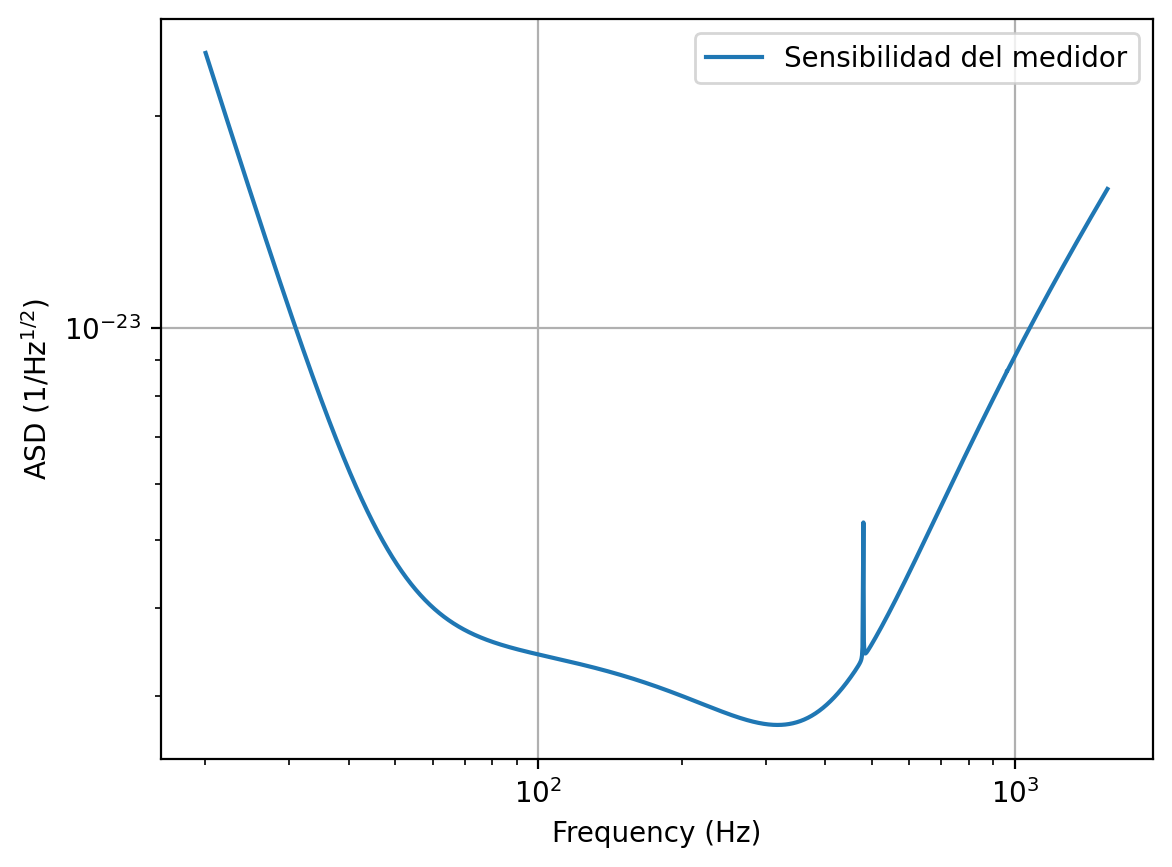

In [ ]:
plt.loglog(freqs, ASD, label = 'Sensibilidad del medidor')
plt.xlabel('Frequency (Hz)')
plt.ylabel('ASD (1/Hz$^{1/2}$)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import scipy.constants as const

d_real = 40*3.086*10**22
masa1= 1.4*2*10**30
masa2 = masa1
mtotal = masa1 * 2
G = const.G
F = 1/5
c = 3*10**8
cted = 1/3 * (G * masa1*masa1 *(np.pi**(2/3)) / (G * mtotal)**(1/3)) #constante que acompaña la derivada
ctei = (4*G*F)/(2*c**3*np.pi**2*d_real**2) #constante que acompaña la integral

#H representa la trasnformada de Fourier de la onda gravitacional, representa la señal dependiente de su frecuencia.
#la onda gravitacional es h(t) y H(f) es su transformada.
def H(f):
  return cted*ctei*f**(-7/3)

#Sn representa cuánta potencia de ruido hay por unidad de frecuencia, qué tan sensible (o ruidoso) es el detector a cada frecuencia.
def sn(f):
  return ASD**2
#El integrando representa cuánta potencia de señal hay en comparación con la potencia del ruido a esa frecuencia.
def integ(f):
  return H(f)/sn(f)
#la integral definida representa la razón entre la amplitud efectiva de la señal y la amplitud del ruido.
#se integra sobre todas las frecuencias para así obtener la relación total sobre el espectro de frecuencias, ese valor es la señal de ruido

In [ ]:
#@title Definición de las funciones integración
from scipy.integrate import simpson

dx = freqs[1:] - freqs[:-1]

def riemann_izq(f, dx):
  return np.sqrt(np.sum(f(freqs)[:-1] * dx))

def riemann_der(f, dx):
  return np.sqrt(np.sum(f(freqs)[1:] * dx))

def trap(f, dx):
  return np.sqrt(np.sum((f(freqs)[1:] + f(freqs)[:-1]) * dx / 2) )

sim = np.sqrt(simpson(integ(freqs), freqs))

print(f'La relación señal-ruido total calculada usando diferentes métodos de aproximación de integración es:')
print(f"Suma de Riemmann por izquierda: {riemann_izq(integ, dx)}")
print(f"Suma de Riemmann por derecha: {riemann_der(integ, dx)}")
print(f"Método del Trapecio: {trap(integ, dx)}")
print(f"Método de Simpson: {sim}")


La relación señal-ruido total calculada usando diferentes métodos de aproximación de integración es:
Suma de Riemmann por izquierda: 38.22344563399233
Suma de Riemmann por derecha: 38.17697291420977
Método del Trapecio: 38.20021634118761
Método de Simpson: 38.20004231319822
[0.04554746 0.04565106 0.0457549  ... 3.53196578 3.53999949 3.54805146]


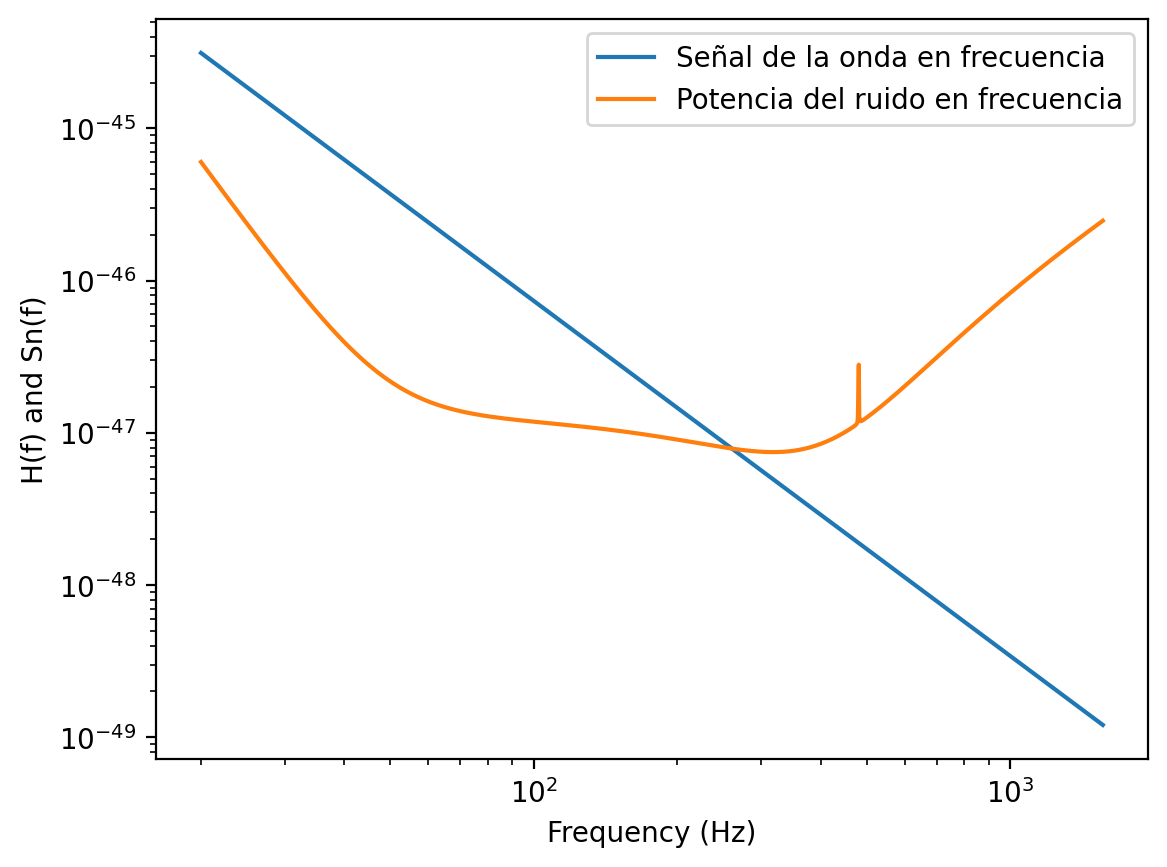

In [ ]:
#Grafica H vs f y Sn vs f, esta gráfica representa que todo lo que está por encima de la franja naranja, es detectable
#todo lo que está por debajo no es detectable ya que el ruido del medidor es mayor a la señal percibida por lo que solo se tendría ruido en los datos obtenidos.
plt.loglog(freqs, H(freqs), label = 'Señal de la onda en frecuencia')
plt.plot(freqs, sn(freqs), label = 'Potencia del ruido en frecuencia')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'H(f) and Sn(f)')
plt.legend()
plt.show()

La varianza se calcula con la relación:


$ \sigma^2 = \int_0^\infty Sn(f) df $

In [ ]:
#@title Varianza
#La varianza representa cuanto puede llegar a oscilar el ruido respecto a su valor promedio
#esa información está contenida en la integral
#Si la varianza es grande, hay mucho ruido en los datos (grande respecto a su valor medio)

def sn_comp(f):
  return ASD_comp**2

var = simpson(sn_comp(freqs_comp), freqs_comp) #Se usa simpson ya que es el método con menor grado de error, h^4
print(f'El valor de varianza es igual a {var}')


El valor de varianza es igual a 6.466015097608645e-41
